# Fase 3

### Cargo Dataset integrado con SPOTIFY API 


In [57]:

import pandas as pd

# File 
input_file = r'C:\Users\edo\Desktop\Final Project\billboard_weekly_ready.csv'
output_file = r'C:\Users\edo\Desktop\Final Project\spotify_weekly_integrated.csv'

start_df = pd.read_csv(input_file)
final_df = pd.read_csv(output_file)

start_df.shape, final_df.shape


((330087, 9), (330073, 16))

#### creo columna id

In [58]:
final_df['id'] = range(1, len(final_df)+1)
# Verifica unicidad
if len(final_df) == final_df['id'].nunique():
    estado = "OK!"
else:
    estado = "WARNING: id no unico"
print(f"{len(final_df)} filas\n{final_df['id'].nunique()} id unicos\n{estado}")


330073 filas
330073 id unicos
OK!


### Exploracion y limpieza pre-analisis del Dataset itegrado (final_df):

In [59]:
final_df.isnull().sum()

year                     0
position                 0
song                     0
artist_main              0
song_and_artist          0
date                     0
track_id                 0
track_name               0
track_popularity         0
album_name               0
release_date             0
duration_ms              0
explicit                 0
artist_id                0
artist_name              0
spotify_genres      103861
id                       0
dtype: int64

In [60]:
final_df.dtypes


year                float64
position            float64
song                 object
artist_main          object
song_and_artist      object
date                 object
track_id             object
track_name           object
track_popularity      int64
album_name           object
release_date         object
duration_ms         float64
explicit               bool
artist_id            object
artist_name          object
spotify_genres       object
id                    int64
dtype: object

In [61]:
final_df.head(5)


,year,position,song,artist_main,song_and_artist,date,track_id,track_name,track_popularity,album_name,release_date,duration_ms,explicit,artist_id,artist_name,spotify_genres,id
0,1958.0,1.0,Poor Little Fool,Ricky Nelson,Poor Little Fool - Ricky Nelson,1958-08-04,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,55,Ricky Nelson (Expanded Edition / Remastered),1958-07-01,153933.0,False,73sSFVlM6pkweLXE8qw1OS,Ricky Nelson,"rockabilly, doo-wop",1
1,1958.0,2.0,Patricia,Perez Prado And His Orchestra,Patricia - Perez Prado And His Orchestra,1958-08-04,1BbZJplex0pifLjhuhoaK5,Patricia,37,Patricia,1958-08-13,139840.0,False,1ZKhPkCXXgtiGgALn4OYtT,Pérez Prado,"mambo, cha cha cha, son cubano, latin jazz, ex...",2
2,1958.0,3.0,Splish Splash,Bobby Darin,Splish Splash - Bobby Darin,1958-08-04,40fD7ct05FvQHLdQTgJelG,Splish Splash,59,Bobby Darin,1958,131719.0,False,0EodhzA6yW1bIdD5B4tcmJ,Bobby Darin,"big band, adult standards, swing music, doo-wop",3
3,1958.0,4.0,Hard Headed Woman,Elvis Presley With The Jordanaires,Hard Headed Woman - Elvis Presley With The Jor...,1958-08-04,2DG7sOMQthZCGxHbqNWzz0,Hard Headed Woman - From the Hal Wallis Produc...,39,Elvis 30 #1 Hits,2002-09-24,114240.0,False,43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,"rockabilly, rock and roll",4
4,1958.0,5.0,When,Kalin Twins,When - Kalin Twins,1958-08-04,3HZJ9BLBpDya4p71VfXSWp,When,41,The Kalin Twins,1958-05-26,146573.0,False,6LXtFndRkOihPIa2dWY3FH,Kalin Twins,doo-wop,5


# 1. Transformaciones basicas

- Cambio year float --> int
- Creo la columna duration_min
- Check fila duplicadas y canciones duplicadas (normal que haya)
- Cambio orden de las columnas

In [62]:
final_df['year'] = final_df['year'].astype(int)
final_df['position'] = final_df['position'].astype(int)
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')
final_df.head(1)

,year,position,song,artist_main,song_and_artist,date,track_id,track_name,track_popularity,album_name,release_date,duration_ms,explicit,artist_id,artist_name,spotify_genres,id
0,1958,1,Poor Little Fool,Ricky Nelson,Poor Little Fool - Ricky Nelson,1958-08-04,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,55,Ricky Nelson (Expanded Edition / Remastered),1958-07-01,153933.0,False,73sSFVlM6pkweLXE8qw1OS,Ricky Nelson,"rockabilly, doo-wop",1


In [63]:
final_df['duration_min'] = (final_df['duration_ms'] / 60000).round(2)
final_df.head(1)

,year,position,song,artist_main,song_and_artist,date,track_id,track_name,track_popularity,album_name,release_date,duration_ms,explicit,artist_id,artist_name,spotify_genres,id,duration_min
0,1958,1,Poor Little Fool,Ricky Nelson,Poor Little Fool - Ricky Nelson,1958-08-04,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,55,Ricky Nelson (Expanded Edition / Remastered),1958-07-01,153933.0,False,73sSFVlM6pkweLXE8qw1OS,Ricky Nelson,"rockabilly, doo-wop",1,2.57


In [64]:
duplicate_rows = final_df.duplicated().sum()
duplicate_tracks = final_df.duplicated(subset=['track_id']).sum()

print(f"filas duplicadas: {duplicate_rows}\ncanciones duplicada: {duplicate_tracks}")


filas duplicadas: 0
canciones duplicada: 301618


In [65]:
cols_order = [
    'id','year', 'date', 'position',
    'song', 'artist_main', 'song_and_artist',
    'album_name', 'release_date',
    'duration_ms', 'duration_min', 'track_popularity',
    'spotify_genres',
    'track_id', 'track_name', 'artist_id', 'artist_name', 'explicit'
]

final_df = final_df[cols_order]

final_df.head(1)


,id,year,date,position,song,artist_main,song_and_artist,album_name,release_date,duration_ms,duration_min,track_popularity,spotify_genres,track_id,track_name,artist_id,artist_name,explicit
0,1,1958,1958-08-04,1,Poor Little Fool,Ricky Nelson,Poor Little Fool - Ricky Nelson,Ricky Nelson (Expanded Edition / Remastered),1958-07-01,153933.0,2.57,55,"rockabilly, doo-wop",5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,73sSFVlM6pkweLXE8qw1OS,Ricky Nelson,False


In [66]:
final_df.dtypes


id                           int64
year                         int64
date                datetime64[ns]
position                     int64
song                        object
artist_main                 object
song_and_artist             object
album_name                  object
release_date                object
duration_ms                float64
duration_min               float64
track_popularity             int64
spotify_genres              object
track_id                    object
track_name                  object
artist_id                   object
artist_name                 object
explicit                      bool
dtype: object

# 2. Preparación y limpieza final del dataset

- 2.1 Gestion de outliers de duración y ELIMINACION
- 2.2  Mismatch artist_main vs artist_name
- 2.3 Gestion de genero musical que faltan (spotify_genres)
- 2.4 Agrupamiento de generos en macro-categorias genre_group
- 2.5 Revision de pistas sospechosas y generos especiales.



## 2.1 Gestion Outliers Duration

- analizar las canciones con duration_min > 15
- analizar las canciones con duration_min < 1.18
- identificar y ELIMINAR cual no son canciones


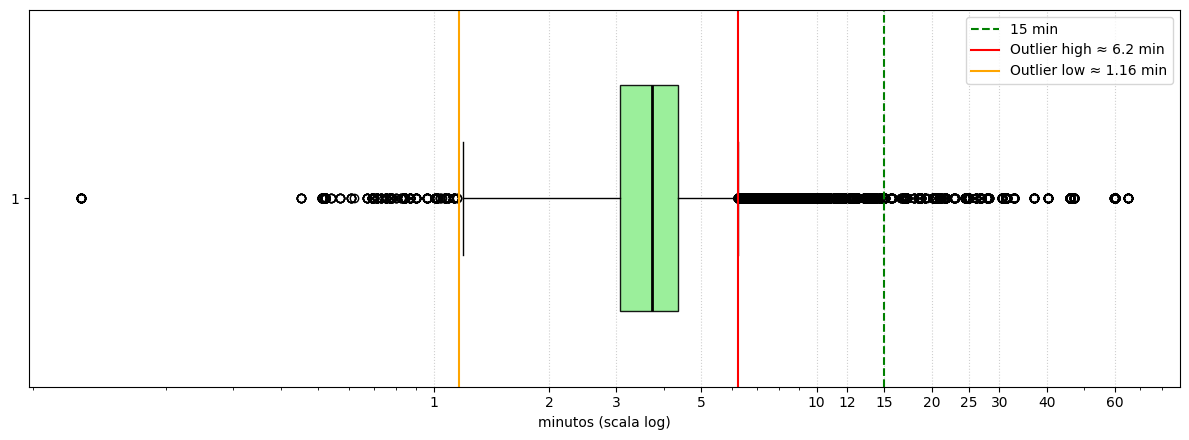

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x = final_df['duration_min']

# limites boxplot
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = max(Q1 - 1.5 * IQR, 0.01)


plt.figure(figsize=(12,4.5))

# Boxplot
plt.boxplot(
    x,
    vert=False,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", alpha=0.9),
    medianprops=dict(color="black", linewidth=2),
)

# Scala log
plt.xscale("log")

# Tick 
ticks = [1, 2, 3, 5, 10, 12, 15, 20, 25, 30, 40, 60]
plt.xticks(ticks, ticks)


plt.grid(axis="x", linestyle=":", alpha=0.6)

# Linea 15 minutos
plt.axvline(15, color="green", linestyle="--", linewidth=1.5, label="15 min")

# Outlier altos
plt.axvline(upper_bound, color="red", linestyle="-", linewidth=1.5,
            label=f"Outlier high ≈ {upper_bound:.1f} min")

# Outlier bajos
plt.axvline(lower_bound, color="orange", linestyle="-", linewidth=1.5,
            label=f"Outlier low ≈ {lower_bound:.2f} min")

plt.xlabel("minutos (scala log)")
plt.legend()
plt.tight_layout()
plt.show()



### OVER 15 min outliers

#### - filtro el data por over 15 min

In [68]:
#per boxplot
df_before_cleaning = final_df.copy()

# Canciones over 15 min
over_15_min_df = final_df[final_df['duration_min'] > 15]

# Num totale tracce
count_over_15_min = len(over_15_min_df)

# Num canzoni uniche
num_unique_over_15 = over_15_min_df['track_name'].nunique()

# Percentuale
percentage_over_15_min = count_over_15_min / len(final_df) * 100

print(f"- Num tot tracks over 15 min: {count_over_15_min}")
print(f"- Num diferentes tracks over 15 min: {num_unique_over_15}")
print(f"- Porcentaje over 15 min: {percentage_over_15_min:.2f}%")

- Num tot tracks over 15 min: 1318
- Num diferentes tracks over 15 min: 50
- Porcentaje over 15 min: 0.40%


In [69]:
over_15_table = ( 
    over_15_min_df.groupby(['track_name'], as_index=False)
    .agg({'duration_min': 'first', 'track_id': 'count'})
    .rename(columns={'track_id': 'num_occurrences'})
    .sort_values(by='num_occurrences', ascending=False)
)
over_15_table.head()

,track_name,duration_min,num_occurrences
29,Rap Up 2022,15.02,205
16,EAULDIE,31.30,172
40,The Interview,45.83,129
17,Freaky Tales,60.23,113
21,Interview with Robin Ross 7/7/93,47.13,56


#### - filtro por keyword

"interview", "commentary", "episode", "podcast","mix", "remix", "edit", "version","remaster", "remastered","live at", "session","tales","congress", "law", "secret", "audiobook", "spoken"


In [70]:
# Filtro por keyword
keywords = [
    "interview", "commentary", "episode", "podcast",
    "mix", "remix", "edit", "version",
    "remaster", "remastered",
    "live at", "session",
    "tales",
    "congress", "law", "secret",
    "audiobook", "spoken"
]

# busca si cualquier palabra clave aparece dentro de un texto
regex = r"(?: " + "|".join([k.replace(" ", r"\s+") for k in keywords]) + r")"

#    df['columna'].str.lower().str.contains(regex, regex=True, na=False)
#     devuelve True si el texto contiene al menos una coincidencia con la expresion
over_15_keyword = over_15_min_df[
    over_15_min_df['track_name'].str.lower().str.contains(regex, regex=True, na=False) |
    over_15_min_df['album_name'].str.lower().str.contains(regex, regex=True, na=False)
]


keyword_table = (
    over_15_keyword
    .groupby(['track_id','track_name', 'album_name', 'artist_name', 'duration_min', 'release_date', 'spotify_genres'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

keyword_table_sorted = keyword_table.sort_values(by=['count', 'duration_min'], ascending=[False, False])

keyword_table_sorted


,track_id,track_name,album_name,artist_name,duration_min,release_date,spotify_genres,count
5,1vd6RAAMj6SZyXFKtsW2jl,The Interview,The Interview,The Smashing Pumpkins,45.83,2010-08-23,"alternative rock, rock",129
4,1uv1c7IVCiudFIqYx9mlJt,Freaky Tales,The Mighty Death Pop,Insane Clown Posse,60.23,2012-08-14,"horrorcore, rap rock",113
9,3576aoW8cZSheoBfh3cnFF,LOVE (a secret visitor) : Commentary (with par...,Album Commentary: [Episode1 : Love],So!YoON!,26.76,2023-04-13,k-rock,46
1,16y0FJCBes7RcTqPtdV7Uu,Congress Shall Make No Law,"""Congress Shall Make No Law . . .""",Frank Zappa,32.76,2010-01-01,"progressive rock, psychedelic rock, art rock, ...",44
16,7IrujOKnlymJAnsV7ScPN5,"Billy The Mountain - Live At Fillmore East, Ju...",The Mothers 1971,Frank Zappa,30.46,2022-03-18,"progressive rock, psychedelic rock, art rock, ...",39
6,2R6DryiugDPjZPoZ5Fgulg,Gave you all my love : Commentary (with Kwangj...,Album Commentary: [Episode1 : Love],So!YoON!,24.47,2023-04-13,k-rock,25
2,1IMa0Il4w988MwZCUcISix,bissu dumm ¿ MEGALODON REMIX,bissu dumm ¿ MEGALODON REMIX,Bonez MC,18.57,2025-04-16,german hip hop,19
0,0ATlCapTlxbOnV4pPQ3uik,Space Mix '98,25 Years Of Disco-Pop,Modern Talking,21.60,2010-01-25,"europop, italo disco, eurodance",17
3,1exUq8aG2OMbSeZeTwz06k,In-A-Gadda-Da-Vida - 2006 Remaster Full-Length,In-A-Gadda-Da-Vida,Iron Butterfly,17.07,1968-06-14,"acid rock, psychedelic rock",17
11,3J8ugaq7n6m1yeWFMWMEWJ,"Billy The Mountain - Live At Pauley Pavilion, ...",Just Another Band From L.A.,Frank Zappa,24.70,1972-03-26,"progressive rock, psychedelic rock, art rock, ...",10


#### - check de las tracks over 15 NO keyword match

In [71]:
# canciones over 15 no controladas en Keyword

# Selecciona las canciones de más de 15 minutos que NO fueron identificadas
# elimina duplicados para que cada canción única aparezca solo una vez,
over_15_to_check = over_15_min_df[
    # Mantiene solo las canciones cuyos track_id NO están en la tabla keyword_table_sorted
    ~over_15_min_df['track_id'].isin(keyword_table_sorted['track_id'])
].drop_duplicates(subset=['track_id', 'track_name', 'artist_name', 'album_name'])

print("Num tracks todavia no controladas:", len(over_15_to_check))
over_15_to_check[['track_id','track_name','artist_name','album_name','duration_min','spotify_genres']]


Num tracks todavia no controladas: 35


,track_id,track_name,artist_name,album_name,duration_min,spotify_genres
7099,1eUtVUyyMqOTCEi3dddYYO,Children of Light (My Dread) Medley,Ita Udoh,Songs of Welfare and Warfare [Spontaneous],27.91,NaN
10476,1LfTvT9JPYuuZanwxLtZCr,Murder Most Foul,Bob Dylan,Rough and Rowdy Ways,16.91,"folk rock, folk, singer-songwriter, roots rock..."
13289,0kO2iMsI35DBVfVEA6PD2d,Berlioz Takes A Trip - Leonard Bernstein explo...,Hector Berlioz,"Berlioz: Symphonie fantastique, Op. 14, H. 48",15.69,"classical, orchestral"
21287,1iUsJr7Poavlvrt85L1l7q,EAULDIE,FLEAU,EAULDIE,31.30,NaN
24899,4KqIchzt1wkEjyh8WXgHJi,Interview with Robin Ross 7/7/93,Meat Loaf,Interview with Robin Ross 7/7/93,47.13,NaN
32299,52RzwGQnzetEVwwplxvGQM,The end of Their World Part II,Akhenaton,The End Of Their World Part II,19.18,"french rap, french r&b"
34989,0EyPbY71NkjwbmErpPnUsv,Infinite Choppers,DOWN6,Infinite Choppers,17.96,NaN
39083,0DJhBpi6FcDn7NaqPQDH9S,Question Mark Medley,Neal Morse,So Many Roads,31.38,"progressive rock, progressive metal, christian..."
47393,39fEG8P3kXhXPAtLEEZ2ni,Rap Scientist,John Lenin and The Funcko Pops,Rap Scientist,20.49,NaN
48091,57XcmLFymH8gNVMP1lkOGI,Rap Up 2022,Uncle Murda,Rap Up 2022,15.02,NaN


#### -  eliminacion de los over_15 NO SONG

In [72]:
import re

# Lista tracks NO CANCION a eliminar
non_songs_names = [
    'Children of Light (My Dread) Medley',
    'Berlioz Takes A Trip - Leonard Bernstein explores the Symphonie fantastique with musical illustrations by the New York Philharmonic',
    'Interview with Robin Ross 7/7/93',
    'The Interview',
    'Question Mark Medley',
    'Congress Shall Make No Law',
    "Record Box: King Jammy's - Continuous Mix",
    'The Strangest Secret',
    'SELF/LESS 01',
    'Smoke Sprite : Commentary (with RM of BTS)',
    'The Waste Land',
    'LOVE (a secret visitor) : Commentary (with parkjiyoon)',
    'Acte IV. Rockollection 008',
    'My Stalker',
    'Surat Yaseen',
    'Credits, Thanks, How, and Why for Reversed Crash in C',
    'Gave you all my love : Commentary (with Kwangjae Jeon)',
    "Techno Valencia MIX / I Want Your Love / Strange / Es Imposible, No Puede Ser / Asi Me Gusta a Mi / Dunne / Chiki Chika / Hellow Daddy / Obession /Ready on the Night / The Dream is Just in My Mind - Techno Valencia Mix (The History) Back to the 90's",
    'Lamba & Motivational Express - Vol. 3'
]

# check inicial
print("- Num tot tracks over 15 min:", len(over_15_min_df))
print("- Num diferentes tracks over 15 min:", over_15_min_df['track_name'].nunique())



# check tracks corrispondecia de track a eliminae
tracks_remaining_exact = final_df[final_df['track_name'].isin(non_songs_names)]
print("\n- Tracks a eliminar :", len(tracks_remaining_exact))
print("- Diferentes tracks a eliminar:", tracks_remaining_exact['track_name'].nunique())


# 
# 
# WARNING ELIMINACION DE RIGAS
# Elimina las tracks en la la lista non_songs_names
final_df = final_df[~final_df['track_name'].isin(non_songs_names)].copy()
# 
# 
# 

# Check final
over_15_after = final_df[final_df['duration_min'] > 15]
print("\nDuespues de la eliminacion:")
print("- Num tot tracks over 15 min:", len(over_15_after))
print("- Num diferentes tracks over 15 min", over_15_after['track_name'].nunique())


- Num tot tracks over 15 min: 1318
- Num diferentes tracks over 15 min: 50

- Tracks a eliminar : 459
- Diferentes tracks a eliminar: 19

Duespues de la eliminacion:
- Num tot tracks over 15 min: 890
- Num diferentes tracks over 15 min 31


### UNDER 1.18 min outliers

#### - filtro el data por under 1 min

In [73]:
# songs under 1.18 min
under_1_min_df = final_df[final_df['duration_min'] < 1.18]

# Num songs under 1 min
count_under_1_min = len(under_1_min_df)

# Num songs unicas
num_unique_under_1_min = under_1_min_df['track_name'].nunique()

# porcentaje
percentage_under_1_min = count_under_1_min / len(final_df) * 100

print(f"- Num tot tracks under 1.18 min: {count_under_1_min}")
print(f"- Num diferentes tracks under 1.18 min: {num_unique_under_1_min}")
print(f"- Porcentaje under 1.18 min: {percentage_under_1_min:.2f}%")



- Num tot tracks under 1.18 min: 467
- Num diferentes tracks under 1.18 min: 38
- Porcentaje under 1.18 min: 0.14%


In [74]:
under_1_table = (
    under_1_min_df
    .groupby(['track_name'], as_index=False)
    .agg({
        'duration_min': 'first',
        'track_id': 'count'
    })
    .rename(columns={'track_id': 'num_occurrences'})
    .sort_values(by='num_occurrences', ascending=False)
)

under_1_table.head()


,track_name,duration_min,num_occurrences
35,Titanium - Bonus Commentary,0.52,124
3,About Like I'm Gonna Lose You - Commentary,0.51,39
14,Everything Has Changed - Commentary,0.96,20
30,Someone,0.75,20
8,Blake Griffin- “Who Do You Love” by YG featuri...,0.12,20


#### - filtro por keyword

"interview", "commentary", "episode", "podcast","mix", "remix", "edit", "version","remaster", "remastered","live at", "session","tales","congress", "law", "secret", "audiobook", "spoken"
"bonus","story behind","behind the song"

In [75]:
# Filtro por keyword para tracks < 1 min
keywords_under = [
    "interview", "commentary", "episode", "podcast",
    "mix", "remix", "edit", "version",
    "remaster", "remastered",
    "live at", "session",
    "tales",
    "congress", "law", "secret",
    "audiobook", "spoken",

    "bonus",
    "story behind",
    "behind the song"
]

# construimos el regex combinando todas las keywords
regex_under = r"(?: " + "|".join([k.replace(" ", r"\s+") for k in keywords_under]) + r")"

# Selecciona todas las canciones <1 min cuyo título o álbum contiene alguna keyword
under_1_keyword = under_1_min_df[
    under_1_min_df['track_name'].str.lower().str.contains(regex_under, regex=True, na=False) |
    under_1_min_df['album_name'].str.lower().str.contains(regex_under, regex=True, na=False)
]

# Construccion de la tabla de resultados igual que en el caso >15 min
keyword_table_under = (
    under_1_keyword
    .groupby([
        'track_id', 'track_name', 'album_name', 'artist_name',
        'duration_min', 'release_date', 'spotify_genres'
    ], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

keyword_table_under_sorted = keyword_table_under.sort_values(
    by=['count', 'duration_min'],
    ascending=[False, False]
)

keyword_table_under_sorted


,track_id,track_name,album_name,artist_name,duration_min,release_date,spotify_genres,count
9,5beOxa4wMl2mu8uJNgZMHK,Titanium - Bonus Commentary,Nothing but the Beat (Bonus Commentary),David Guetta,0.52,2011-08-30,edm,124
1,1MwhjvmxOhPTgs4BuHFP8t,Think of You (Duet with Cassadee Pope) - Story...,I'm Comin' Over - Stories Behind the Songs,Chris Young,0.77,2015-11-13,"country, acoustic country",20
3,2wgGEBEqV4cglUhKmSLESV,Still Tippin,Paul Wall Mixtape,Swishahouse,0.71,2008,southern hip hop,13
5,3vUczJxn2vsKJci0O16N7E,Hematófago - Commentary,Proaño (Commentary),Enjambre,1.07,2015-03-31,"mexican indie, rock en español, mexican rock, ...",11
7,4aYhP9rhMGDkBGNTip4qrD,"Diabelli Variations, Op. 120: Var. 2. Poco all...","""A Classical Gem: Masterpieces from Baroque to...",Ludwig van Beethoven,1.09,2025-10-30,"classical, classical piano, chamber music",7
2,2h5cpnAVMC4kOOLF7NqmIr,Meant For You - Remastered 2001,Friends (Remastered),The Beach Boys,0.67,1968-06-24,baroque pop,7
4,3IQcmuVqLgKlgAYi1FQdfR,The Carnival of the Animals: III. Mules,Saint-Saëns: The Carnival of the Animals - Str...,Sir John Barbirolli,0.78,2014-07-15,"classical, opera",4
6,4X67GEVFLnhd21ELaeYWmx,"Perhaps, the Joy of Giving",It's A Happening World (Expanded Edition),The Tokens,0.54,1967,doo-wop,4
0,0rHToGels2lt8Y0mCYoF90,Deck The Hall,The Christmas Song (Expanded Edition),Nat King Cole,1.15,1962,"christmas, adult standards, vocal jazz",2
8,518kNqoySogpI6oQeUy02N,No Royalty Album Filler No. 9,Circus: The Bernie Grundman Remaster 2022,Eraserheads,1.04,1994,"opm, pinoy rock, pinoy alternative, harana, p-...",2


#### - check de las tracks over 15 NO keyword match

In [76]:
# canciones under 1.18 min no controladas en Keyword

# Selecciona las canciones de menos de 1.18 minutos que NO fueron identificadas
# elimina duplicados para que cada canción única aparezca solo una vez
under_1_to_check = under_1_min_df[
    # Mantiene solo las canciones cuyos track_id NO están en la tabla keyword_table_under_sorted
    ~under_1_min_df['track_id'].isin(keyword_table_under_sorted['track_id'])
].drop_duplicates(subset=['track_id', 'track_name', 'artist_name', 'album_name'])

print("Num tracks todavia no controladas:", len(under_1_to_check))
under_1_to_check[['track_id','track_name','artist_name','album_name','duration_min','spotify_genres']]


Num tracks todavia no controladas: 28


,track_id,track_name,artist_name,album_name,duration_min,spotify_genres
29397,0plB568xZogENOR0jtcr6r,Pop Goes the Weasel,Kindermusik International,Too-Da-La,1.02,children's music
44783,1RT0WtqDpYZA6rhLtXuQIS,"Intro: ""Don't Sing Along; It Puts Me Off"" - Live",Micky Dolenz,"A Little Bit Broadway, A Little Bit Rock & Rol...",0.45,NaN
58588,6whR5SbvjPoiKzAA2fcggb,"12 Duos, K. 487: No. 8, Allegro (Arr. for Pian...",Wolfgang Amadeus Mozart,"Piano Exam Pieces 2025 & 2026, ABRSM Grade 1",0.80,"classical, opera, requiem, classical piano, ch..."
72590,04LL918sfjXolHQB8evxCV,Silver Bullet,The Briefs,Hit After Hit,1.13,"power pop, punk, proto-punk"
82595,487UKSobC0jCkCoof5awBl,Punch Line,Minutemen,Introducing the Minutemen,0.70,"post-punk, punk, hardcore punk, proto-punk, po..."
90396,6fEgCSMaFXzrrez00c70rv,Agon - Ballet for Twelve Dancers: Prelude,Igor Stravinsky,Stravinsky: Agon & Canticum sacrum,0.83,"classical, neoclassical, orchestral"
121570,1gHMXLjzglKbU2aqNPygwj,WKRP In Cincinnati,Television's Greatest Hits Band,Television's Greatest Hits - Classic Sitcoms,0.75,NaN
122568,2HwUoc4ESkCYhv7CvWMFxt,A White House Cantata / Part 2: Pity the Poor,Leonard Bernstein,The Leonard Bernstein Collection - Volume 1 - ...,0.57,"classical, orchestral"
125164,7Icdkrvmho7wN3yp8qb4qa,Da Bomb,Amy Dorsey,Return Of The Bumpasaurus,0.84,NaN
177765,3bepuyr9mDS16ysd1SSipm,Thank You for Being a Friend - Golden Girls Th...,Paul Hankinson Covers,Thank You for Being a Friend - Golden Girls Th...,1.02,NaN


#### - eliminacion de los under_1 NO SONG

In [77]:

import re

# Lista tracks NO CANCION a eliminar under 1.18 min
non_songs_under_1_min = [
    'Titanium - Bonus Commentary',
    'Think of You (Duet with Cassadee Pope) - Story Behind the Song',
    'Hematófago - Commentary',
    'No Royalty Album Filler No. 9',
    'Breathe - Commentary',
    'V4T',
    'Everything Has Changed - Commentary',
    'Blake Griffin- “Who Do You Love” by YG featuring Drake',
    "About Like I'm Gonna Lose You - Commentary",
    '22 - Commentary'
]

# check inicial
under_1_min_df = final_df[final_df['duration_min'] < 1.18]
print("- Num tot tracks under 1.18 min:", len(under_1_min_df))
print("- Num diferentes tracks under 1.18 min:", under_1_min_df['track_name'].nunique())

# costruisci regex dai titoli
pattern = '|'.join([re.escape(f) for f in non_songs_under_1_min])
mask_to_delete = final_df['track_name'].str.contains(pattern, case=False, regex=True, na=False)

# check tracks corrispondenza
tracks_remaining_exact_under = final_df[mask_to_delete]
print("\n- Tracks a eliminar under 1.18 min:", len(tracks_remaining_exact_under))
print("- Diferentes tracks a eliminar under 1.18 min:", tracks_remaining_exact_under['track_name'].nunique())

# WARNING ELIMINACION DE RIGAS
final_df = final_df[~mask_to_delete].copy()

# Check final
under_1_after = final_df[final_df['duration_min'] < 1.18]
print("\nDuespues de la eliminacion:")
print("- Num tot tracks under 1.18 min:", len(under_1_after))
print("- Num diferentes tracks under 1.18 min", under_1_after['track_name'].nunique())

- Num tot tracks under 1.18 min: 467
- Num diferentes tracks under 1.18 min: 38

- Tracks a eliminar under 1.18 min: 240
- Diferentes tracks a eliminar under 1.18 min: 10

Duespues de la eliminacion:
- Num tot tracks under 1.18 min: 227
- Num diferentes tracks under 1.18 min 28


### Resumen

In [78]:
# --- Over 15 minutos ---
over_15_before = df_before_cleaning[df_before_cleaning['duration_min'] > 15]
over_15_after = final_df[final_df['duration_min'] > 15]

print("- Over 15 minutos")
print(f"Antes de la limpieza: {len(over_15_before)} tracks")
print(f"Despues de la limpieza: {len(over_15_after)} tracks")

# --- Under 1.18 minutos ---
under_1_before = df_before_cleaning[df_before_cleaning['duration_min'] < 1.18]
under_1_after = final_df[final_df['duration_min'] < 1.18]

print("\n- Under 1.18 minutos")
print(f"Antes de la limpieza: {len(under_1_before)} tracks")
print(f"Despues de la limpieza: {len(under_1_after)} tracks")

# --- Total de filas eliminadas ---
total_before = len(df_before_cleaning)
total_after = len(final_df)
rows_removed = total_before - total_after
percent_removed = rows_removed / total_before * 100

print("\n- Total de filas eliminadas")
print(f"Filas eliminadas: {rows_removed} tracks")
print(f"Porcentaje respecto al total: {percent_removed:.3f}%")



- Over 15 minutos
Antes de la limpieza: 1318 tracks
Despues de la limpieza: 890 tracks

- Under 1.18 minutos
Antes de la limpieza: 467 tracks
Despues de la limpieza: 227 tracks

- Total de filas eliminadas
Filas eliminadas: 699 tracks
Porcentaje respecto al total: 0.212%


##  2.2 Mismatch artist_main vs artist_name
- identificacion mismatch (artist_name parece fiable)
- SAVE de mismatch file mismatch_artist_to_api, RIELABORAR EN API EN FUTURO
- resolucion (ELIMINACION) mismatch y check finale (report mismatch) artist_main != artist_name
- 
- (EN FUTURO) Merge de los mismatch correcto en file principal y recheck mismatch


### - mismatch artist_main vs artist_name

In [79]:
import pandas as pd
import unidecode  # libreria per quitar accentos

# #####################################
# Funcion para normalizar nombres de artista
# Esta funcion convierte el nombre en minusculas, quita espacios
# iniciales/finales, elimina acentos y limpia palabras de contexto comunes
def normalize_artist(name):
    if pd.isna(name):
        # si el valor es NaN devolvemos string vacio
        return ""
    name = name.lower().strip()
    # quita acentos
    name = unidecode.unidecode(name)
    # reemplazar simbolos comunes
    name = name.replace("&", "and").replace("-", " ")
    # eliminar palabras de contexto como 'featuring', 'with', 'his', 'the'
    import re
    pattern = r'\b(featuring|with|his|the)\b'
    name = re.sub(pattern, '', name)
    # eliminar espacios multiples
    name = re.sub(r'\s+', ' ', name).strip()
    return name

# Aplicamos normalizacion a artist_main y artist_name
final_df['artist_main_norm'] = final_df['artist_main'].apply(normalize_artist)
final_df['artist_name_norm'] = final_df['artist_name'].apply(normalize_artist)

# #####################################
# Funcion para identificar mismatch reales
# Devuelve True si el artist_main y artist_name normalizados
# NO coinciden de forma significativa
def mismatch_real(row):
    main = row['artist_main_norm']
    name = row['artist_name_norm']
    
    # Si uno de los dos nombres contiene al otro -> NO es mismatch real
    # Esto captura casos como "Jerry Butler" vs "Jerry Butler and the Impressions"
    # donde uno es subset del otro
    return not (main in name or name in main)

# Aplicamos filtro de mismatch reales
final_df['artist_mismatch_signif'] = final_df.apply(mismatch_real, axis=1)

# #####################################
# Report de los mismatches encontrados
mismatch_table = final_df[final_df['artist_mismatch_signif']]
total_mismatch = len(mismatch_table)
total_tracks = len(final_df)

print(f"- numero total mismatch: {total_mismatch}")
print(f"- porcentaje de mismatch respecto al total: {total_mismatch/total_tracks*100:.2f}%")


- numero total mismatch: 49799
- porcentaje de mismatch respecto al total: 15.12%


In [80]:
mismatch_table[['track_id','artist_id','artist_main','artist_name','album_name','song','duration_min']].head()


,track_id,artist_id,artist_main,artist_name,album_name,song,duration_min
26,23R3NTnNUt1YktcDDTLcAd,3wYyutjgII8LJVVOLrGI0D,The Crickets,Buddy Holly,Buddy Holly,Think It Over,1.77
32,3AgKmGfswhkIRMRxDH7A7S,3ScY9CQxNLQei8Umvpx5g6,Tony And Joe,Fat Joe,Loyalty,The Freeze,4.95
49,6oWhUfePc5h9r5pfw7wvPN,5GXruybcLmXPjR9rKKFyS6,Jimmy Bowen with the Rhythm Orchids,Jimmy Smith,Midnight Special (Remastered),By The Light Of The Silvery Moon,9.95
63,7fxpR18CmzkASOoIzEzWnI,1SQRv42e4PjEYfPhS0Tk9E,Jerry Lee Lewis And His Pumping Piano,The Kinks,Preservation Act 1 (Deluxe),High School Confidential,4.52
70,16SR8whOdLohXYqAlO5EGL,1Mxqyy3pSjf8kZZL4QVxS0,Frank Gallup,Frank Sinatra,Selections From A Voice On Air (1935-1955),Got A Match?,4.08


In [81]:
#  Distribucion por anyo
mismatch_by_year = mismatch_table.groupby('year').size().reset_index(name='count')
mismatch_by_year = mismatch_by_year.sort_values(by='count', ascending=False)
mismatch_by_year


,year,count
52,2010,1437
62,2020,1345
58,2016,1334
55,2013,1309
59,2017,1242
...,...,...
28,1986,489
27,1985,477
29,1987,470
20,1978,468


In [82]:
# Distribucion por genero musical  (spotify_genres)
mismatch_by_genre = mismatch_table[mismatch_table['spotify_genres'].notnull()].groupby('spotify_genres').size().reset_index(name='count')
mismatch_by_genre = mismatch_by_genre.sort_values(by='count', ascending=False)
mismatch_by_genre

,spotify_genres,count
1160,"yacht rock, soft rock",597
1008,southern hip hop,459
383,east coast hip hop,447
367,"doo-wop, northern soul, motown",313
900,rap,306
...,...,...
20,"afro house, melodic house, afro tech",1
17,"afro adura, nigerian drill, afropiano, afrobeat",1
1161,"yacht rock, soft rock, folk rock",1
4,"acid jazz, smooth jazz, jazz funk",1


### - SAVE de mismatch file mismatch_artist_to_api, RIELABORAR EN API EN FUTURO

In [83]:

# Guardar CSV para reintegro con API
mismatch_table[['id',
    'year',
    'date',
    'position',
    'song',
    'artist_main',
    'song_and_artist']].to_csv("mismatch_artist_para_api.csv", index=False)
print("CSV de mismatch guardado para reintegro con API")


CSV de mismatch guardado para reintegro con API


In [84]:
mismatch_table.shape

(49799, 21)

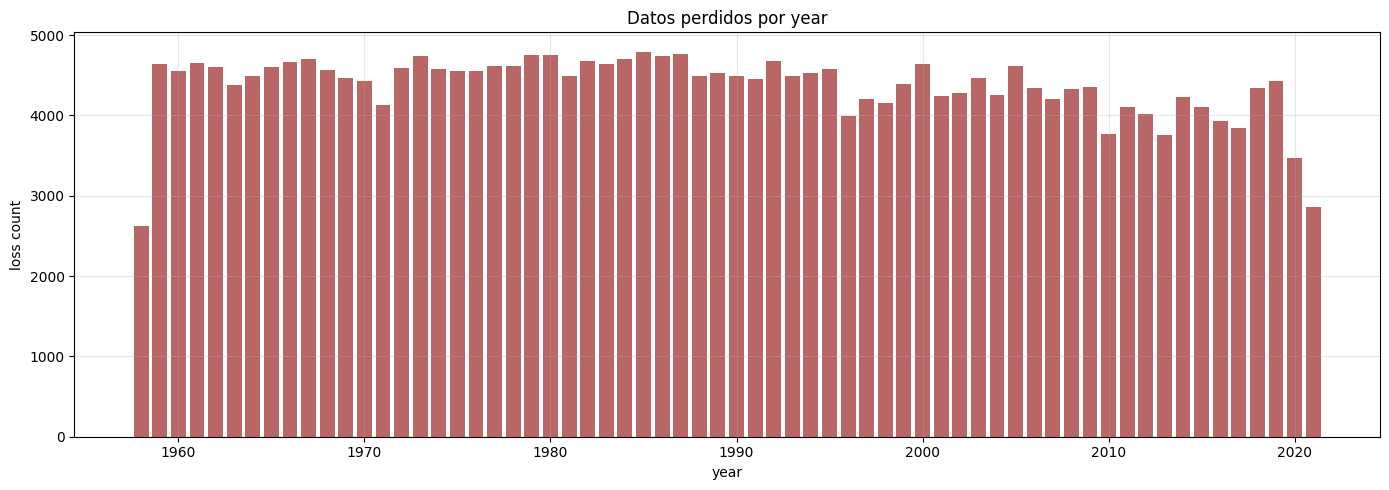

In [85]:
import matplotlib.pyplot as plt

loss = (
    final_df['year'].value_counts().sort_index()
    - mismatch_table['year'].value_counts().sort_index()
).fillna(0).astype(int)

plt.figure(figsize=(14,5))
plt.bar(loss.index, loss.values, color="darkred", alpha=0.6)

plt.title("Datos perdidos por year")
plt.xlabel("year")
plt.ylabel("loss count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### - resolucion (ELIMINACION) mismatch y check finale (report mismatch)

In [86]:
# total antes de filtrar
num_total_before = len(final_df)


# WARNING
#
# 
#
#
# ELIMINATION de filas con mismatch
final_df = final_df[~final_df['artist_mismatch_signif']].copy()


# Eliminacion de columnas innecesarias
cols_a_eliminar = [
    'artist_mismatch_signif',      
    'artist_main_norm',           
    'artist_name_norm'             
]
final_df.drop(columns=cols_a_eliminar, inplace=True)


# Check final del dataset limpio
num_total_clean = len(final_df)
num_eliminados = num_total_before - num_total_clean
perc_eliminados = 100 * num_eliminados / num_total_before

print(f"Filas eliminadas: {num_eliminados}")
print(f"Porcentaje eliminado: {perc_eliminados:.2f}%")
print(f"Filas restantes: {num_total_clean}")

Filas eliminadas: 49799
Porcentaje eliminado: 15.12%
Filas restantes: 279575


### - (EN FUTURO) Merge de los mismatch correcto en file principal y recheck mismatch

In [87]:
### DUE TO 
## merge reintegrated mismatch a final_df

## 2.3 Gestion de genero musical que faltan (spotify_genres)


- exploracion de los missing_genre
- Propagacion por artista presente en dataset
- integracion por artist_genre_map
    - diccionario con artistas y sus generos.
    - Asignar los generos faltantes según el diccionario
- check final


### - exploracion de los missing_genre

In [88]:
# Numero total de canciones sin spotify_genres
missing_total = final_df['spotify_genres'].isna().sum()
missing_percent = missing_total / len(final_df) * 100
print(f"Numero total de canciones sin genero\n{missing_total} ({missing_percent:.2f}%)")



Numero total de canciones sin genero
80711 (28.87%)


In [89]:
# Analisis de artistas con mas generos faltantes

# Agrupamos por artista 
artist_missing_counts = final_df[final_df['spotify_genres'].isna()].groupby('artist_name').size().sort_values(ascending=False)

# Top 20 artistas
top_artists_missing = artist_missing_counts.head(20)

print("Top 20 artistas con mas missing genre:")
top_artists_missing



Top 20 artistas con mas missing genre:


artist_name
Taylor Swift          1022
Elton John             891
Madonna                799
Michael Jackson        662
P!nk                   598
Whitney Houston        593
Beyoncé                587
Rihanna                586
Neil Diamond           525
The Weeknd             522
Dionne Warwick         479
Bruno Mars             470
Imagine Dragons        423
Black Eyed Peas        414
Cher                   411
Justin Bieber          409
Olivia Newton-John     405
Post Malone            386
Bryan Adams            373
Gloria Estefan         341
dtype: int64

In [90]:
# en Porcentaje sobre total de missing
top_artists_missing_percent = (top_artists_missing / len(final_df[final_df['spotify_genres'].isna()]) * 100).round(2)
print("Porcentaje sobre total de missing genre:")
top_artists_missing_percent

Porcentaje sobre total de missing genre:


artist_name
Taylor Swift          1.27
Elton John            1.10
Madonna               0.99
Michael Jackson       0.82
P!nk                  0.74
Whitney Houston       0.73
Beyoncé               0.73
Rihanna               0.73
Neil Diamond          0.65
The Weeknd            0.65
Dionne Warwick        0.59
Bruno Mars            0.58
Imagine Dragons       0.52
Black Eyed Peas       0.51
Cher                  0.51
Justin Bieber         0.51
Olivia Newton-John    0.50
Post Malone           0.48
Bryan Adams           0.46
Gloria Estefan        0.42
dtype: float64

### - propagacion de genero por artista y integracion por artist_genre_map

- si un artista tiene generos conocidos en otras canciones, se propagan a las canciones sin genero
- tambien utilizamos un dizionario para anyadir mas generos a artista al que le faltan




In [91]:
artist_genre_map = {
    
    "Alexis Jordan": "pop, R&B, dance-pop",
    "Echosmith": "indie pop, pop rock",
    "Nico & Vinz": "pop, hip hop, R&B",
    "Moving Pictures": "rock, pop rock",
    "Freddie & The Dreamers": "pop, beat",
    "Matthew Wilder": "pop, soft rock",
    "Mary MacGregor": "pop, soft rock",
    "Jack Wagner": "pop, adult contemporary",
    "The Sandpipers": "easy listening, pop",
    "Counting Crows": "alternative rock, pop rock",
    "Martin Page": "pop rock, soft rock",
    "DJ Hotday": "hip hop, electronic",
    "Dido": "pop, trip hop, adult contemporary",
    "Ingrid Michaelson": "indie pop, folk pop",
    "Wild Orchid": "pop, R&B",
    "Aly & AJ": "pop rock, pop",
    "Kristen Bell": "pop",
    "Quality Control": "hip hop, rap",
    "Glass Animals": "indie pop, psychedelic pop",
    "AOORA": "K-pop, R&B",
    "MAGIC!": "reggae fusion, pop rock",
    "Clipse": "hip hop, rap",
    "Offset": "hip hop, trap",
    "Manfred Mann": "rock, pop rock",
    "The Highwaymen": "country",
    "Daryl Hall": "pop rock, soft rock",
    "Hozier": "indie rock, soul, alternative",
    "Maureen McGovern": "pop, Broadway",
    "Rhythm Heritage": "funk, soul, disco",
    "Steve Stylez": "R&B, pop",
    "Shank1e": "hip hop, rap",
    "Bill Medley": "R&B, soul, pop",
    "AV3RY!": "pop, hip hop",
    "Zara Larsson": "pop, dance-pop",
    "Bo Donaldson & The Heywoods": "pop, soft rock",
    "Frank Ocean": "R&B, soul, alternative R&B",
    "Wale": "hip hop, rap",
    "Gudda Gudda": "hip hop, rap",
    "Killa": "hip hop, rap",
    "Lindsey Buckingham": "rock, pop rock",
    "Nu Flavor": "R&B, pop",
    "John Paul Young": "pop, disco",
    "Dove Cameron": "pop, teen pop",
    "Samantha Mumba": "pop, R&B",
    "Ollie Twist": "hip hop, rap",
    "New Boyz": "hip hop, rap",
    "Crash Test Dummies": "alternative rock, folk rock",
    "SHAED": "electropop, indie pop",
    "Blind Channel": "rock, nu metal",
    "Mashonda": "R&B, hip hop",
    "Meredith Brooks": "rock, pop rock",
    "Eddie Hodges": "pop, rock and roll",
    "Livin' Joy": "dance, house",
    "Trevor Daniel": "pop, R&B",
    "Five": "pop, boy band",
    "ELU": "hip hop, rap",
    "Karmin": "pop, R&B",
    "Hypaton": "hip hop, rap",
    "Alannah Myles": "rock, pop rock",
    "The Youngbloods": "folk rock, rock",
    "Tate McRae": "pop, electropop",
    "Charlene": "pop, soul",
    "Rico Love": "R&B, hip hop",
    "JayAitch": "hip hop, rap",
    "Frank Mills": "instrumental, easy listening",
    "Beverly Bremers": "pop, adult contemporary",
    "Candyman": "R&B, hip hop",
    "Marianne Faithfull": "rock, pop",
    "Benzino": "hip hop, rap",
    "Gladys Knight": "soul, R&B",
    "Ace Hood": "hip hop, rap",
    "Sonny J": "electronic, dance",
    "Candi Carpenter": "pop, country",
    "Karaoke Juice": "karaoke",
    "Bobby \"Boris\" Pickett & The Crypt-Kickers": "novelty, pop",
    "Shontelle": "pop, R&B",
    "Hot": "R&B, pop",
    "Last Call": "pop",
    "Amy Winehouse": "soul, jazz, R&B",
    "Albert 2 Stone": "pop",
    "All Saints": "pop, R&B",
    "Diana King": "reggae, pop",
    "Crow": "rock, pop rock",
    "The Greg Kihn Band": "rock, pop rock",
    "The Neighbourhood": "indie pop, alternative",
    "Sy Ari Da Kid & Quentin Miller": "hip hop, rap",
    "Blue Swede": "pop rock, novelty",
    "O-Town": "pop, boy band",
    "The Addrisi Brothers": "pop, soft rock",
    "Pont Aeri": "dance, electronic",
    "Drakeo the Ruler": "hip hop, rap",
    "Amanda Perez": "R&B, pop",
    "Tones And I": "pop, electropop",
    "American Authors": "indie pop, pop rock",
    "Kevin Paige": "pop, adult contemporary",
    "Karla Bonoff": "soft rock, pop",
    "Timbaland & Magoo": "hip hop, R&B",
    "Ric Ocasek": "rock, new wave",
    "Chumbawamba": "pop rock, alternative rock",
    "Carolyn Dawn Johnson": "country, pop",
    "Bastille": "indie pop, alternative rock, synth-pop",
    "Des'ree": "pop, soul, R&B",
    "ZAYN": "pop, R&B",
    "Gallery": "pop, soft rock",
    "Keri Hilson": "R&B, pop",
    "Karaoke Library": "karaoke",
    "XTM": "dance, eurodance",
    "The Four Seasons": "pop rock, doo-wop",
    "Joshua Kadison": "pop, soft rock",
    "Once Jamison": "pop",
    "Afroman": "hip hop, rap",
    "The Tubes": "rock, new wave",
    "Amasic": "pop",
    "Ryan Cabrera": "pop rock, pop",
    "Lloyd Banks": "hip hop, rap",
    "Portugal. The Man": "alternative rock, indie rock, psychedelic rock",
    "Duncan Sheik": "pop rock, adult contemporary",
    "Iyaz": "R&B, pop",
    "JoJo": "pop, R&B",
    "Dave \"Baby\" Cortez": "pop, instrumental rock",
    "Hannah Montana": "pop, teen pop",
    "Juic3 Akins": "hip hop, rap",
    "Daya": "pop, electropop",
    "The Classics IV featuring Dennis Yost": "soft rock, pop",
    "Rachel Platten": "pop, adult contemporary",
    "Silentó": "hip hop, rap",
    "Tone-Loc": "hip hop, rap, pop rap",
    "Hot Chelle Rae": "pop rock, pop",
    "Sandy Posey": "pop, country",
    "Hilary Duff": "pop, teen pop",
    "Neneh Cherry": "pop, hip hop, trip hop",
    "will.i.am": "pop, hip hop, dance",
    "Nino Tempo & April Stevens": "pop, easy listening",
    "Boy Meets Girl": "pop rock, synth-pop",
    "The Fortunes": "pop rock, beat",
    "Burton Cummings": "rock, pop rock",
    "Tyga": "hip hop, rap",
    "Chris Isaak": "rock, pop rock, rockabilly",
    "City Girls": "hip hop, rap",
    "Waka Flocka Flame": "hip hop, trap",
    "Paul Evans": "pop, rock and roll",
    "Chad Brock": "country",
    "Freddie Scott": "soul, R&B",
    "Voskresenskii": "pop",
    "Andrew Gold": "pop rock, soft rock",
    "fee.": "pop rock, contemporary Christian",
    "Hanson": "pop rock, pop",
    "BBMAK": "pop rock, boy band",
    "Kenny Nolan": "pop, soft rock",
    "Dave East": "hip hop, rap",
    "Baba Brinkman": "hip hop, rap",
    "DJ ReDo": "hip hop, electronic",
    "Nivea": "R&B, pop",
    "John Parr": "rock, pop rock",
    "Cass Elliot": "pop, folk rock",
    "Tommy Page": "pop, dance-pop",
    "Blue October": "alternative rock, indie rock",
    "Blaque": "R&B, pop",
    "Rockwell": "R&B, pop, funk",
    "K Zeus": "hip hop",
    "Mick Jagger": "rock, classic rock",
    "Mark Morrison": "R&B, soul",
    "3OH!3": "electropop, hip hop",
    "James Blunt": "pop rock, adult contemporary",
    "Lauv": "pop, electropop",
    "Snow": "reggae, hip hop, pop",
    "Jay Sean": "R&B, pop",
    "Patty Smyth": "rock, pop rock",
    "The Seekers": "folk, pop",
    "Kid Rock": "rock, rap rock, country",
    "Danity Kane": "R&B, pop",
    "Bedoes 2115": "hip hop, rap",
    "Five Star": "pop, R&B",
    "Paul Petersen": "pop, teen pop",
    "D12": "hip hop, rap",
    "ScHoolboy Q": "hip hop, rap",
    "Marilyn McCoo": "pop, R&B, soul",
    "Eagle-Eye Cherry": "pop rock, alternative rock",
    "Jack Ü": "electronic, dance, pop",
    "Buckcherry": "hard rock, rock",
    "Fifth Harmony": "pop, R&B",
    "Mandy Moore": "pop, teen pop",
    "Guy Mitchell": "pop, rock and roll",
    "Alex Clare": "pop, soul, electronic",
    "David Soul": "pop rock, soft rock",
    "The Cranberries": "alternative rock, pop rock",
    "Kid Cudi": "hip hop, rap",
    "Cassadee Pope": "country, pop",
    "Jim Jones": "hip hop, rap",
    "Joe South": "rock, pop, country",
    "Jigsaw": "pop, soft rock",
    "Mike DiNatale": "pop",
    "Jesse Johnson": "R&B, funk",
    "The Power Station": "rock, pop rock",
    "The Foundations": "soul, R&B, pop",
    "Meco": "disco, pop",
    "Capital Cities": "indie pop, synth-pop",
    "Elisa Fiorillo": "pop, R&B",
    "The Tremeloes": "pop rock, beat",
    "Best Instrumentals": "instrumental, pop",
    "D.Valentino": "pop, R&B",
    "Finger Eleven": "rock, alternative rock, post-grunge",
    "BLP KOSHER": "hip hop, rap",
    "BFM Hits": "pop",
    "Gary Puckett & The Union Gap": "pop rock, soft rock",
    "Carly Rae Jepsen": "pop, dance-pop",
    "B2K": "R&B, hip hop, pop",
    "Backtrack Professional Karaoke Band": "karaoke",
    "Jessie J": "pop, R&B",
    "Crowded House": "rock, pop rock",
    "Jet": "rock, garage rock, alternative rock",
    "Foster The People": "indie pop, indie rock",
    "Saweetie": "hip hop, rap",
    "Knowmads": "hip hop, rap",
    "Paul Carrack": "soft rock, pop rock, blue-eyed soul",
    "The Bachelors": "pop, easy listening",
    "Mustard": "hip hop, rap, trap",
    "Martika": "pop, dance-pop",
    "Norah Jones": "jazz, pop, soul",
    "Mike WiLL Made-It": "hip hop, trap, rap",
    "Chris Montez": "pop, easy listening",
    "Dickie Goodman": "comedy, novelty",
    "blackbear": "R&B, pop, hip hop",
    "LFO": "pop, dance-pop, boy band",
    "Eve": "hip hop, rap, R&B",
    "Katrina & The Waves": "pop rock, new wave",
    "Skeeter Davis": "country, pop, rockabilly",
    "Jeremih": "R&B, hip hop",
    "Glass Tiger": "pop rock, new wave",
    "Russ": "hip hop, R&B",
    "Nick Jonas": "pop, R&B",
    "Fine Young Cannibals": "pop rock, new wave",
    "Sisqo": "R&B, pop",
    "Donnie Iris": "rock, pop rock",
    "Kid Quill": "hip hop, rap",
    "Vanessa Carlton": "pop, piano pop",
    "O.C. Smith": "R&B, soul, pop",
    "Young MC": "hip hop, rap",
    "2000's Karaoke Band": "karaoke",
    "Sheila E.": "funk, pop, R&B",
    "Snow Patrol": "alternative rock, indie rock",
    "Mase": "hip hop, rap",
    "Del Amitri": "rock, pop rock",
    "Everything But The Girl": "pop, jazz, electronic",
    "6ix9ine": "hip hop, rap, trap",
    "Edwin McCain": "rock, pop rock, singer-songwriter",
    "Tommy James": "pop rock, psychedelic rock",
    "Christina Milian": "pop, R&B",
    "benny blanco": "pop, electronic",
    "ProTracks (Karaoke)": "karaoke",
    "Elle King": "pop rock, blues rock",
    "Annette with the Afterbeats": "pop, rock",
    "Tzale7=ram": "hip hop, rap",
    "Sister Hazel": "rock, alternative rock, pop rock",
    "David Cook": "pop rock, rock",
    "Gorillaz": "alternative rock, hip hop, electronic",
    "The Rascals": "rock, soul",
    "The Five Stairsteps": "soul, R&B",
    "WALK THE MOON": "pop rock, alternative rock",
    "Brownsville Station": "rock, hard rock",
    "Jamie O'Neal": "country",
    "Bazzi": "pop, R&B",
    "KT Tunstall": "pop rock, folk rock",
    "Owl City": "synthpop, electronic, pop",
    "Yung Bleu": "hip hop, R&B",
    "Kc Raw": "hip hop",
    "The McCoys": "rock, pop rock",
    "Desiigner": "hip hop, trap",
    "WordzPerfect": "hip hop",
    "Berlin": "new wave, synthpop",
    "Dan Hill": "soft rock, pop, adult contemporary",
    "Party Machine": "karaoke",
    "Sixpence None The Richer": "pop rock, alternative rock",
    "Jermaine Stewart": "pop, R&B",
    "Kelly Rowland": "R&B, pop",
    "Mark Lindsay": "pop rock, rock",
    "The Rembrandts": "pop rock, soft rock",
    "Dax": "hip hop, rap",
    "Terror Squad": "hip hop, rap",
    "Richard Chamberlain": "pop, easy listening",
    "Vanilla Ice": "hip hop, rap",
    "MiMS": "hip hop, rap",
    "Donna Lewis": "pop, adult contemporary",
    "DNCE": "pop, dance-pop",
    "Cutting Crew": "pop rock, new wave",
    "Better Than Ezra": "alternative rock, pop rock",
    "Lana Del Rey": "pop, baroque pop, dream pop",
    "Audio Idols": "karaoke",
    "Maxine Nightingale": "pop, soul",
    "CeeLo Green": "R&B, pop, soul",
    "The Wanted": "pop, dance-pop",
    "Jennifer Hudson": "R&B, pop",
    "Blu Cantrell": "R&B, pop",
    "The New Seekers": "pop, easy listening",
    "Kelis": "R&B, pop, soul",
    "Swing Out Sister": "pop, jazz, sophisti-pop",
    "Lisa Loeb & Nine Stories": "pop rock, folk pop",
    "Snapdibz": "hip hop",
    "Amerie": "R&B, pop",
    "ShittyBoyz": "hip hop",
    'The Searchers': 'pop rock, beat',  
    'Kings of Leon': 'alternative rock, southern rock, indie rock', 
    'Bebe Rexha': 'pop, dance-pop, R&B',  
    'Billy Ray Cyrus': 'country, country pop',  
    'Deniece Williams': 'soul, R&B, gospel',  
    'Cassidy': 'hip hop, rap',  
    "Plain White T's": 'pop rock, alternative rock',  
    'Tory Lanez': 'hip hop, R&B, rap',  
    'Breathe': 'soft rock, pop rock',  
    'Toad The Wet Sprocket': 'alternative rock, folk rock',  
    'Barenaked Ladies': 'pop rock, alternative rock',  
    'Hailee Steinfeld': 'pop, electropop',  
    'Floyd Cramer': 'country, pop, instrumental',  
    'Camila Cabello': 'pop, Latin pop',  
    'Timbaland': 'hip hop, R&B, pop',  
    'NEFFEX': 'electronic, hip hop',  
    "Gilbert O'Sullivan": 'pop, singer-songwriter, soft rock',  
    'Sam The Sham & The Pharaohs': 'rock and roll, pop',  
    'The Escape Club': 'pop rock, new wave',  
    'Quarterflash': 'rock, pop rock',  
    'Lil Yachty': 'hip hop, trap',  
    'Lil Pump': 'hip hop, trap',  
    'Tracy Chapman': 'folk, pop, singer-songwriter',  
    'Crystal Waters': 'house, dance-pop, R&B',  
    'AWOLNATION': 'alternative rock, electronic rock',  
    'SHeDAISY': 'country, pop',  
    'Niall Horan': 'pop, pop rock',  
    'Trini Lopez': 'folk, pop, rock',  
    'Mr. Mister': 'pop rock, soft rock',  
    'Vertical Horizon': 'alternative rock, pop rock',  
    'Alanis Morissette': 'alternative rock, pop rock',  
    'Kodak Black': 'hip hop, rap, trap',  
    'Taio Cruz': 'pop, dance-pop, R&B',  
    'The Kid LAROI': 'rap, pop, hip hop',  
    'Kevin Gates': 'hip hop, rap',  
    'fun.': 'indie pop, alternative rock',  
    'Don McLean': 'folk, soft rock',  
    'Smash Mouth': 'pop rock, alternative rock',  
    'Five For Fighting': 'pop rock, piano rock',  
    'Lizzo': 'pop, hip hop, R&B',  
    'P.M. Dawn': 'hip hop, R&B, pop',  
    'Paula Cole': 'pop, rock, adult contemporary',  
    'Adam Lambert': 'pop, glam rock',  
    'Sue Thompson': 'pop, country',  
    'Robin S': 'dance-pop, house',  
    'Jennifer Warnes': 'pop, soft rock, folk rock',  
    'Kim Wilde': 'pop, new wave',  
    'Shaun Cassidy': 'pop, rock',  
    'Jim Stafford': 'country, folk, pop',  
    'Gary Puckett & The Union Gap': 'pop, rock',  
    'Ava Max': 'pop, dance-pop',  
    'Garbage': 'alternative rock, electronic rock',  
    'Tove Lo': 'pop, electropop',  
    'Adam Wade': 'pop, jazz, easy listening',  
    'James Bay': 'pop rock, indie rock',  
    'Craig David': 'R&B, pop, UK garage',  
    'Carly Rae Jepsen': 'pop, dance-pop',  
    'Bobbie Gentry': 'country, pop, folk',  
    'Jesse McCartney': 'pop, pop rock',  
    'NLE Choppa': 'hip hop, rap, trap',  
    'Go West': 'pop, pop rock, blue-eyed soul',  
    'AJR': 'indie pop, electropop',  
    'Gym Class Heroes': 'hip hop, pop rap, rock',  
    'Sananda Maitreya': 'R&B, soul, funk',  
    'The Archies': 'bubblegum pop',  
    'Jack Harlow': 'hip hop, rap',  
    'Mac Miller': 'hip hop, alternative hip hop',  
    'Albert Hammond': 'pop rock, soft rock',  
    'Julian Lennon': 'pop rock, soft rock',  
    'Glenn Medeiros': 'pop, soul, adult contemporary',  
    'Ray J': 'R&B, pop',  
    'X Ambassadors': 'pop rock, alternative rock',  
    'Spin Doctors': 'rock, alternative rock',  
    'House Of Pain': 'hip hop, rap',
    'Sandro Martinez Featuring Sandra': 'pop',
    'ProSource Karaoke': 'pop',
    'FLEAU': 'pop',
    'Ameritz Countdown Karaoke': 'pop',
    '98º': 'pop',
    'Lobo': 'soft rock, pop',
    'Ameritz - Karaoke': 'pop',
    'Ameritz Audio Karaoke': 'pop',
    'Studio Allstars': 'pop',
    'Starlite Karaoke': 'pop',
    'Sensity World': 'pop',
    'All-4-One': 'R&B, pop',
    'Linda Scott': 'pop, doo-wop',
    'Robbie Nevil': 'pop rock, pop',
    'DJ KIMERA': 'pop',
    'The Box Tops': 'rock, pop rock',
    'Lulu': 'pop, soul',
    'Tiffany': 'pop, teen pop',
    'The Young Rascals': 'rock, soul',
    'Candi Staton': 'soul, R&B, gospel',
    'Party Tyme Karaoke': 'pop',
    'Hot Chocolate': 'soul, funk, disco',
    'Robert Plant': 'rock, hard rock',
    'Ameritz Karaoke Crew': 'pop',
    'French Montana': 'hip hop, rap',
    'Uncle Kracker': 'rock, country rock, pop',
    'Frankie J': 'R&B, pop',
    'Childish Gambino': 'hip hop, R&B',
    'Bonnie Tyler': 'pop rock, soft rock',
    'Art Garfunkel': 'folk, pop',
    'Moneybagg Yo': 'hip hop, rap',
    'Andy Kim': 'pop, rock',
    'Sia': 'pop, dance-pop',
    'Neon Trees': 'alternative rock, pop rock',
    'YG': 'hip hop, rap',
    'Cathy Dennis': 'pop, dance-pop',
    'Arrested Development': 'hip hop, alternative hip hop',
    'Jerry Wallace': 'country, pop',
    'Andy Grammer': 'pop, pop rock',
    'Natasha Bedingfield': 'pop, soul',
    'Skillz': 'hip hop, rap',
    'Blood, Sweat & Tears': 'jazz rock, pop rock',
    'Sophie B. Hawkins': 'pop, rock',
    'Polo G': 'hip hop, trap',
    'Leona Lewis': 'pop, soul',
    'Mike Posner': 'pop, hip hop, dance-pop',
    'Gerry & The Pacemakers': 'pop, rock',
    'Melanie': 'folk, pop',
    'Tyler, The Creator': 'hip hop, alternative hip hop',
    'The Hooters': 'rock, pop rock',
    'T-Pain': 'R&B, hip hop',  
    'Blessid Union Of Souls': 'pop rock, alternative rock',  
    'Frankie Valli': 'pop, doo-wop',  
    'Gavin DeGraw': 'pop rock, soul',  
    'Peter And Gordon': 'pop, rock',  
    'Paul Young': 'pop, soul',  
    'The Pussycat Dolls': 'pop, dance-pop, R&B',  
    'Jordin Sparks': 'pop, R&B',  
    'DJ Snake': 'electronic, dance, trap',  
    'Kris Kross': 'hip hop, rap',  
    'Gin Blossoms': 'alternative rock, pop rock',  
    'The Outfield': 'rock, pop rock',  
    'Rick Astley': 'pop, dance-pop',  
    'Sara Bareilles': 'pop, piano pop',  
    'Selena Gomez & The Scene': 'pop, dance-pop',  
    'Pharrell Williams': 'hip hop, pop, R&B',  
    'Bruce Hornsby and the Range': 'rock, pop rock',  
    'Van Morrison': 'rock, folk rock, soul',  
    'The Script': 'pop rock, soft rock',  
    'Michelle Branch': 'pop rock, pop',  
    'Milli Vanilli': 'pop, dance-pop',  
    'Chaka Khan': 'R&B, funk, soul',  
    'Sugar Ray': 'pop rock, alternative rock',  
    'Donny & Marie Osmond': 'pop, easy listening',  
    'Joe Budden': 'hip hop, rap',  
    'No Doubt': 'ska punk, rock, pop rock',  
    'War': 'funk, R&B, soul',  
    'Men At Work': 'rock, new wave',  
    'Lisa Stansfield': 'R&B, pop, soul',  
    'Rod Wave': 'hip hop, R&B, trap',  
    'Twista': 'hip hop, rap',  
    'C & C Music Factory': 'dance-pop, house, hip hop',  
    'David Cassidy': 'pop, pop rock',  
    'John Cafferty & the Beaver Brown Band': 'rock, pop rock',  
    'Lil Nas X': 'hip hop, pop, country rap',  
    'Miami Sound Machine': 'latin pop, dance-pop',  
    'Jackie DeShannon': 'pop, rock',  
    'Lupe Fiasco': 'hip hop, rap',
    'Starship': 'rock, arena rock, pop rock',
    'Rae Sremmurd': 'hip hop, trap',
    'George Harrison': 'rock, pop',  
    '5 Seconds of Summer': 'pop rock, power pop',  
    'Logic': 'hip hop, rap',  
    'Spice Girls': 'pop, dance-pop',  
    'Joe Cocker': 'rock, blue-eyed soul',  
    'The Turtles': 'pop rock, rock',  
    'Robin Thicke': 'R&B, soul, pop',  
    'Herb Alpert': 'jazz, pop, easy listening',  
    '98°': 'pop, R&B',  
    'Ringo Starr': 'rock, pop',  
    'Simply Red': 'soul, pop, blue-eyed soul',  
    'Harry Styles': 'pop rock, soft rock',  
    'Jessica Simpson': 'pop, pop rock',  
    'T-Pain': 'R&B, hip hop',  
    'Jimmy Buffett': 'pop rock, country rock',  
    'Wilson Phillips': 'pop, soft rock',  
    'The Chainsmokers': 'electropop, dance-pop',  
    'Meat Loaf': 'rock, hard rock, pop rock',  
    'Lorde': 'electropop, art pop',  
    'Alessia Cara': 'pop, R&B',  
    'Donny Osmond': 'pop, easy listening',  
    'Nelly Furtado': 'pop, dance-pop',  
    'Soulja Boy': 'hip hop, rap',  
    'CeCe Peniston': 'dance-pop, R&B',  
    'Pretenders': 'rock, new wave',  
    'Megan Thee Stallion': 'hip hop, trap',  
    'Nancy Sinatra': 'pop, traditional pop',  
    'Macklemore & Ryan Lewis': 'hip hop, pop',  
    'Wyclef Jean': 'hip hop, reggae, R&B',  
    'Will Smith': 'hip hop, pop',  
    'Johnny Nash': 'reggae, pop',  
    'MC Hammer': 'hip hop, pop',  
    'Belinda Carlisle': 'pop rock, new wave',  
    'Rita Coolidge': 'pop, soft rock',  
    'Mýa': 'R&B, pop',  
    'Fetty Wap': 'trap, hip hop',  
    'All-4-One': 'R&B, pop',
    'B.J. Thomas': 'pop, country, soft rock',
    'The Righteous Brothers': 'pop, blue-eyed soul',
    'Laura Branigan': 'pop, dance-pop, adult contemporary',
    'Petula Clark': 'pop, vocal',
    "Herman's Hermits": 'pop, rock, beat',
    'Ray Parker Jr.': 'R&B, pop, funk',
    '*NSYNC': 'pop, teen pop, dance-pop',
    'Halsey': 'pop, electropop, alternative pop',
    'Billy Idol': 'rock, punk rock, new wave',
    'Engelbert Humperdinck': 'pop, vocal, easy listening',
    'Loverboy': 'rock, hard rock, pop rock',
    'Debbie Gibson': 'pop, dance-pop',
    'Culture Club': 'pop, new wave, soul',
    'The Monkees': 'pop rock, rock, bubblegum pop',
    'Stevie Nicks': 'rock, soft rock, pop rock',
    'DaBaby': 'hip hop, trap, rap',
    'Glenn Frey': 'rock, soft rock, pop rock',
    'Ben E. King': 'R&B, soul, pop',
    'Twenty One Pilots': 'alternative rock, electropop, hip hop',
    'Melissa Etheridge': 'rock, pop rock, folk rock',
    'Brian Hyland': 'pop, teen pop',
    'Kim Carnes': 'pop rock, soft rock',
    'Lesley Gore': 'pop, teen pop',
    'Rob Thomas': 'pop rock, alternative rock',
    'Hootie & The Blowfish': 'rock, pop rock, alternative rock',
    'Juice Newton': 'country pop, pop rock',
    'Vanessa Williams': 'R&B, pop, soul',
    'Dusty Springfield': 'pop, soul, blue-eyed soul',
    'Gwen Stefani': 'pop, dance-pop, ska punk',
    "Booker T. & the M.G.'s": 'soul, R&B, instrumental rock',
    'Sonny & Cher': 'pop, rock, folk',
    'Tony Orlando & Dawn': 'pop, soft rock, disco',
    'Third Eye Blind': 'alternative rock, pop rock',
    'LMFAO': 'electro, dance-pop, hip hop',
    'Blondie': 'new wave, punk rock, pop rock',
    '21 Savage': 'hip hop, trap, rap',
    'Sean Kingston': 'reggae fusion, pop, hip hop',
    'Big Sean': 'hip hop, rap',
    'Irene Cara': 'pop, R&B, dance-pop',
    'Fabolous': 'hip hop, rap',
    'Akon': 'R&B, hip hop, pop',
    'Gary Lewis & The Playboys': 'pop, rock, beat',
    'Ronnie Dove': 'pop, country pop, easy listening',
    'Girl Talk': 'mashup, electronic, hip hop',
    'Seal': 'R&B, soul, pop',
    'Sade': 'soul, R&B, smooth jazz',
    'Fergie': 'pop, hip hop, R&B',
    'Lenny Kravitz': 'rock, funk, soul',
    'Bobby Goldsboro': 'pop, country',
    'Jermaine Jackson': 'R&B, soul, pop',
    'The Dave Clark Five': 'rock, pop',
    'Paul McCartney': 'rock, pop, classical',
    'Johnny Rivers': 'rock, pop, blues',
    'The Fray': 'pop rock, alternative rock',
    'Kesha': 'pop, dance-pop, electropop',
    'Taylor Dayne': 'pop, dance-pop',
    'New Kids On The Block': 'pop, R&B',
    'Cyndi Lauper': 'pop, rock, new wave',
    'The Police': 'rock, new wave, reggae rock',
    'Jon Secada': 'pop, Latin pop, R&B',
    'Colbie Caillat': 'pop, folk pop',
    'Sarah McLachlan': 'pop, adult contemporary, soft rock',
    'Olivia Rodrigo': 'pop, pop rock, alternative pop',
    'Savage Garden': 'pop, pop rock',
    'Meghan Trainor': 'pop, doo-wop, dance-pop',
    'Bette Midler': 'pop, vocal, adult contemporary',
    'Doja Cat': 'pop, hip hop, R&B',
    'Taylor Swift': 'pop, country pop, indie folk',
    'Uncle Murda': 'hip hop, rap',
    'Beyoncé': 'R&B, pop, hip hop, soul',
    'Rihanna': 'pop, R&B, dance-pop, reggae, dancehall',
    'The Karaoke Crew': 'pop',  
    'Party Tyme': 'pop',  
    'P!nk': 'pop, pop rock', 
    'The Weeknd': 'R&B, pop, alternative R&B',  
    'Neil Diamond': 'pop, rock', 
    'Black Eyed Peas': 'hip hop, pop, dance',  
    'Justin Bieber': 'pop, R&B',  
    'Olivia Newton-John': 'pop, soft rock, country',  
    'Pitbull': 'hip hop, pop, reggaeton',  
    'Post Malone': 'hip hop, pop, trap, rock',  
    'Bryan Adams': 'rock, soft rock, pop rock',  
    'Nicki Minaj': 'hip hop, pop, rap',  
    'Gloria Estefan': 'latin pop, dance-pop, pop',  
    'DJ Khaled': 'pop, hip hop, rap',  
    'Jason Derulo': 'pop, R&B',  
    'Lil Baby': 'hip hop,rap, trap',
    'Bruce Springsteen': 'rock, heartland rock, folk rock',  
    'Shawn Mendes': 'pop, folk pop',  
    'TLC': 'R&B, hip hop, soul',  
    "Destiny's Child": 'R&B, pop',  
    'Billie Eilish': 'electropop, alternative pop',  
    'Huey Lewis & The News': 'rock, pop rock, blue-eyed soul',  
    'The 5th Dimension': 'soul, pop, psychedelic soul',  
    'Christina Aguilera': 'pop, R&B',  
    'One Direction': 'pop, pop rock',  
    'George Michael': 'pop, dance-pop, soul',  
    'Miley Cyrus': 'pop, pop rock, country pop',  
    'Three Dog Night': 'rock, pop rock',  
    'Avril Lavigne': 'pop punk, pop rock',  
    'Anne Murray': 'country, pop',  
    'Khalid': 'R&B, pop',  
    'Sheena Easton': 'pop, dance-pop',  
    'ABBA': 'pop, disco',  
    'Santana': 'rock, latin rock',  
    'Helen Reddy': 'pop, soft rock',  
    'Carly Simon': 'soft rock, pop',
    'Demi Lovato': 'pop, pop rock',   
    'Nelly': 'hip hop, rap',  
    'Tina Turner': 'rock, pop, soul',  
    'Tom Jones': 'pop, soul, rock',  
    "James Brown & The Famous Flames": 'soul, funk, R&B',  
    'Paula Abdul': 'pop, dance-pop',  
    'Survivor': 'rock, arena rock',  
    'Flo Rida': 'hip hop, pop rap',  
    'The Goo Goo Dolls': 'rock, alternative rock, pop rock',  
    'Jonas Brothers': 'pop, pop rock',  
    'The Hollies': 'pop rock, classic rock',  
    'Daughtry': 'rock, post-grunge',  
    'Ciara': 'R&B, pop',  
    'Gene Pitney': 'pop, rock',  
    'YoungBoy Never Broke Again': 'hip hop, rap',  
    'Selena Gomez': 'pop, electropop',  
    'Cardi B': 'hip hop, rap',  
    'Tommy James & The Shondells': 'pop rock, rock',  
    'The Karaoke Channel': 'pop',
    'Ellie Goulding': 'electropop, indie pop',
    'Elton John': 'pop, rock, soft rock',  
    'Madonna': 'pop, dance-pop, electronic',  
    'Michael Jackson': 'pop, R&B, funk, soul',  
    'Studio Group': 'pop',   
    'Whitney Houston': 'R&B, pop, soul',  
    'Bruno Mars': 'pop, R&B, funk, soul',  
    'Dionne Warwick': 'pop, soul, adult contemporary',  
    'Done Again': 'pop',  
    'Imagine Dragons': 'pop rock, alternative rock, electropop',  
    'Cher': 'pop, dance-pop, rock',  
    'Justin Timberlake': 'pop, R&B, dance-pop',  
    'Backstreet Boys': 'pop, teen pop',  
    'Coldplay': 'alternative rock, pop rock, post-Britpop',  
    'LeAnn Rimes': 'country, pop',  
    'Jennifer Lopez': 'pop, R&B, dance-pop',  
    'Sheryl Crow': 'rock, pop rock, country pop',  
    'Ameritz Karaoke Entertainment': 'pop',    
    'Wings': 'rock, pop rock, soft rock',  
    'INXS': 'rock, new wave, alternative rock',  
    'Ne-Yo': 'R&B, pop, soul',  
}


In [92]:
def fill_artist_genre(row):
    if pd.isna(row['spotify_genres']) and row['artist_name'] in artist_genre_map:
        return artist_genre_map[row['artist_name']]
    return row['spotify_genres']


In [93]:

# Controlo missing y porcentaje
missing_before = final_df['spotify_genres'].isna().sum()
percent_before = missing_before / len(final_df) * 100
print(f"Generos faltantes antes de ARTISTA propagation: {missing_before} ({percent_before:.2f}%)")

# aplico propagacion
final_df['spotify_genres'] = final_df.apply(fill_artist_genre, axis=1)

# Contorlo missing despues 
missing_after = final_df['spotify_genres'].isna().sum()
percent_after = missing_after / len(final_df) * 100
print(f"Generos faltantes despues de ARTISTA propagation: {missing_after} ({percent_after:.2f}%)")
print(f"Generos agregados por ARTISTA: {missing_before - missing_after} ({percent_before - percent_after:.2f}%)")



Generos faltantes antes de ARTISTA propagation: 80711 (28.87%)
Generos faltantes despues de ARTISTA propagation: 17966 (6.43%)
Generos agregados por ARTISTA: 62745 (22.44%)


In [94]:
# Top artist con genero faltantes
missing_artists = (
    final_df[final_df['spotify_genres'].isna()]
    .groupby('artist_name')
    .size()
    .sort_values(ascending=False)
)


missing_artists.head(20)


artist_name
Lumidee                36
Brotherhood of Man     36
Damita Jo              36
Deep Blue Something    36
Metro Station          36
Merril Bainbridge      36
Surfaces               35
Bobbi Martin           35
Brenton Wood           35
Arthur Alexander       35
Tierra                 35
Kris Allen             35
Jennifer Holliday      35
Tommy Tutone           35
Don Toliver            35
OMI                    35
Pras                   35
Liz Phair              34
Lighthouse             34
Marc Cohn              34
dtype: int64

## 2.4 Agrupamiento de generos en macro-categorias genre_group

- check numero genero diferentes
- definiccion y agrupaccio por macro-generos
- check final de los generos
- graficos de generos

### - check numero genero diferentes

In [95]:
final_df.tail()

,id,year,date,position,song,artist_main,song_and_artist,album_name,release_date,duration_ms,duration_min,track_popularity,spotify_genres,track_id,track_name,artist_id,artist_name,explicit
330062,330063,2021,2021-11-06,96,To Be Loved By You,Parker McCollum,To Be Loved By You - Parker McCollum,Gold Chain Cowboy,2021-07-30,199680.0,3.33,59,"texas country, red dirt, country",2pUQX4d3Cjh3umGkVz0XyI,To Be Loved By You,0Z8XVUAOBPM4x12wKnFHEQ,Parker McCollum,False
330063,330064,2021,2021-11-06,34,Ain't Shit,Doja Cat,Ain't Shit - Doja Cat,Planet Her,2021-06-25,174253.0,2.90,75,"pop, hip hop, R&B",5lAnYvAIkSDNXqfo7DyFUm,Ain't Shit,5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,True
330064,330065,2021,2021-11-06,91,Life Goes On,Oliver Tree,Life Goes On - Oliver Tree,"Ugly is Beautiful: Shorter, Thicker & Uglier (...",2021-05-28,161803.0,2.70,73,NaN,0eu4C55hL6x29mmeAjytzC,Life Goes On,6TLwD7HPWuiOzvXEa3oCNe,Oliver Tree,False
330066,330067,2021,2021-11-06,58,Nevada,YoungBoy Never Broke Again,Nevada - YoungBoy Never Broke Again,"Sincerely, Kentrell",2021-09-24,155737.0,2.60,80,"hip hop, rap",2cEnKRR4dYBB2VA1mjlb1z,Nevada,7wlFDEWiM5OoIAt8RSli8b,YoungBoy Never Broke Again,True
330068,330069,1994,1994-05-07,74,"Stay (I Missed You) (From ""Reality Bites"")",Lisa Loeb & Nine Stories,"Stay (I Missed You) (From ""Reality Bites"") - L...",Stay (I Missed You),1994-05-17,184333.0,3.07,64,NaN,00U1MDChdOTxWwtKoOoBXE,Stay (I Missed You),1TMMyiSsNzmRiZCAkVLVb2,Lisa Loeb,False


In [96]:
# Conteo de todos los generos individuales
generos_individuales = final_df['spotify_genres'].dropna().apply(lambda x: x.split(', ')).explode().unique()
print(f"Numero de generos individuales: {len(generos_individuales)}")


Numero de generos individuales: 447


In [97]:
generos_individuales

array(['rockabilly', 'doo-wop', 'mambo', 'cha cha cha', 'son cubano',
       'latin jazz', 'exotica', 'big band', 'adult standards',
       'swing music', 'rock and roll', 'surf rock', 'psychobilly',
       'vocal jazz', 'jazz', 'kundiman', 'philly soul', 'classic soul',
       'northern soul', 'motown', 'soul', 'classic country',
       'outlaw country', 'country', 'christmas', 'boogie-woogie',
       'traditional country', 'polka', 'italian singer-songwriter',
       'canzone napoletana', 'italo dance', 'bolero', 'horror punk',
       'schlager', 'soul jazz', 'honky tonk', 'christian country',
       'drum and bass', 'drumstep', 'liquid funk', 'jungle', 'rock',
       'pop', 'blues', 'orchestral', 'easy listening', 'classic blues',
       'villancicos', 'baroque pop', 'cajun', 'zydeco', 'southern gospel',
       'gospel', 'proto-punk', 'jazz blues', 'calypso', 'indorock',
       'jangle pop', 'power pop', 'electro swing', 'reggae', 'funk',
       'R&B', 'soul blues', 'samba', 'argent

### - definiccion y agrupaccio por macro-generos

In [98]:
# Normalizacion de los generos
#######################################
import unicodedata

# Funcion - normalizar un genero
def normalizar_genero(genero_original):
    # Si el valor es NaN devolvemos cadena vacia
    if pd.isna(genero_original):
        return ""

    # Quitamos espacios y convertimos a minusculas
    genero_limpio = genero_original.strip().lower()

    # Eliminamos acentos y caracteres especiales
    # .normalize('NFKD', ...) separa los caracteres base de los acentos
    # .encode('ascii', 'ignore') elimina lo que no es ASCII
    # .decode('ascii') reconstruye la cadena limpia
    genero_normalizado = unicodedata.normalize('NFKD', genero_limpio).encode('ascii', 'ignore').decode('ascii')

    return genero_normalizado

# Funcion - de cadena de generos a lista limpiada
def dividir_generos_cadena(cadena_generos):
    if pd.isna(cadena_generos) or str(cadena_generos).strip() == "":
        return []

    lista_generos = [
        normalizar_genero(genero_texto)
        for genero_texto in str(cadena_generos).split(",") if genero_texto.strip() != ""
    ]

    return lista_generos

# Creacion de columna limpia con lista de generos
final_df["spotify_genres_list"] = final_df["spotify_genres"].apply(dividir_generos_cadena)

print("Normalizacion completada:\n- spotify_genres_list actualizada")


Normalizacion completada:
- spotify_genres_list actualizada


In [99]:
# Mapping manual  de generos
#######################################

# Diccionario principal 
mapping_manual = {

# ---- FIX Finale Residui ----

"musicals": "Vintage/Traditional/Musical",

"rocksteady": "Reggae/Ska",

"brazilian jazz": "Jazz",
"bossa nova": "Jazz",    
"samba": "Latin/Caribbean",  

"indie": "Rock",  

"neue deutsche welle": "Rock",

"italian singer-songwriter": "Folk/Acoustic",
"canzone napoletana": "Folk/Acoustic",

"southern gothic": "Rock",

"zydeco": "Folk/Acoustic",  

"budots": "Electronic/Dance",
"funkot": "Electronic/Dance",

"bhangra": "Latin/Caribbean",  

"traditional music": "Vintage/Traditional/Musical",

"go-go": "HipHop",   

"lounge": "Vintage/Traditional/Musical",

"rkt": "Latin/Caribbean",
"neoperreo": "Latin/Caribbean",

"hyperpop": "Electronic/Dance",

"boom bap": "HipHop",

"krautrock": "Rock",

"afropop": "Afro/African",

"choral": "Classical/Orchestral",

"happy hardcore": "Electronic/Dance",
"hardstyle": "Electronic/Dance",
"eurodance": "Electronic/Dance",  

"jungle": "Electronic/Dance",
"drumstep": "Electronic/Dance",
"liquid funk": "Electronic/Dance",

"industrial": "Rock",   # industrial rock/metal → Rock è migliore


    # ---- FIX residui finali ----

    # Vintage / Traditional / Musical
    "comedy": "Vintage/Traditional/Musical",
    "novelty": "Vintage/Traditional/Musical",
    "lullaby": "Vintage/Traditional/Musical",
    "soundtrack": "Vintage/Traditional/Musical",
    "native american music": "Vintage/Traditional/Musical",
    "gregorian chant": "Vintage/Traditional/Musical",
    "medieval": "Vintage/Traditional/Musical",
    "ballroom vogue": "Vintage/Traditional/Musical",
    "ragtime": "Vintage/Traditional/Musical",
    "schlagerparty": "Vintage/Traditional/Musical",
    "chanson": "Vintage/Traditional/Musical",
    "children's music": "Vintage/Traditional/Musical",

    # Folk / Acoustic
    "trova": "Folk/Acoustic",
    "cajun": "Folk/Acoustic",
    "polka": "Folk/Acoustic",

    # Latin / Caribbean
    "musica mexicana": "Latin/Caribbean",
    "tejano": "Latin/Caribbean",
    "dembow": "Latin/Caribbean",
    "bolero": "Latin/Caribbean",
    "corrido": "Latin/Caribbean",
    "urbano latino": "Latin/Caribbean",
    "trap latino": "Latin/Caribbean",
    "sierreno": "Latin/Caribbean",
    "sad sierreno": "Latin/Caribbean",
    "corridos tumbados": "Latin/Caribbean",
    "grupera": "Latin/Caribbean",
    "sertanejo": "Latin/Caribbean",
    "sertanejo tradicional": "Latin/Caribbean",
    "sertanejo universitario": "Latin/Caribbean",
    "manele": "Latin/Caribbean",

    # Electronic / Dance
    "uk garage": "Electronic/Dance",
    "europop": "Electronic/Dance",
    "eurodance": "Electronic/Dance",
    "moombahton": "Electronic/Dance",
    "dream pop": "Electronic/Dance",
    "neo-psychedelic": "Electronic/Dance",
    "shoegaze": "Electronic/Dance",
    "funk melody": "Electronic/Dance",
    "alternative dance": "Electronic/Dance",
    "big beat": "Electronic/Dance",
    "trip hop": "Electronic/Dance",
    "breakbeat": "Electronic/Dance",
    "italo dance": "Electronic/Dance",
    "future bass": "Electronic/Dance",
    "new rave": "Electronic/Dance",
    "soca": "Electronic/Dance",

    # Rock / Punk
    "gothic rock": "Rock",
    "indorock": "Rock",
    "rockabilly": "Rock",
    "britpop": "Rock",
    "blues rock": "Rock",
    "madchester": "Rock",
    "riot grrrl": "Punk",
    "deathrock": "Punk",
    "post-punk": "Punk",

    # Blues → R&B/Soul
    "blues": "R&B/Soul",
    "classic blues": "R&B/Soul",
    "modern blues": "R&B/Soul",
    "soul blues": "R&B/Soul",

    # Jazz crossovers
    "jazz blues": "Jazz",
    "bebop": "Jazz",

    # HipHop
    "trap": "HipHop",
    "grime": "HipHop",
    "sexy drill": "HipHop",
    "hyphy": "HipHop",

    # Seasonal
    "villancicos": "Seasonal/Holiday",

    # Experimental/Alternative
    "new age": "Experimental/Alternative",
    "spoken word": "Experimental/Alternative",
    "cold wave": "Experimental/Alternative",
    "darkwave": "Experimental/Alternative",

    # ---- Rock ----
    "rock": "Rock",
    "rock and roll": "Rock",
    "surf rock": "Rock",
    "classic rock": "Rock",
    "psychedelic rock": "Rock",
    "alternative rock": "Rock",
    "indie rock": "Rock",
    "argentine rock": "Rock",
    "latin rock": "Rock",
    "garage rock": "Rock",
    "jangle pop": "Rock",
    "celtic rock": "Rock",
    "jam band": "Rock",
    "instrumental rock": "Rock",
    "soft rock": "Rock",
    "pop rock": "Rock",
    "southern rock": "Rock",
    "noise rock": "Rock",
    "aor": "Rock",
    "new wave": "Rock",
    "post-grunge": "Rock",
    "arena rock": "Rock",
    "yacht rock": "Rock",
    "grunge": "Rock",
    "folk rock": "Rock",
    "emo": "Rock",
    "pop punk": "Rock",

    # ---- Pop ----
    "pop": "Pop",
    "dance pop": "Pop",
    "teen pop": "Pop",
    "bubblegum pop": "Pop",
    "indie pop": "Pop",
    "bedroom pop": "Pop",
    "pop soul": "Pop",
    "city pop": "Pop",
    "schlager": "Pop",
    "nederpop": "Pop",
    "variete francaise": "Pop",
    "kayokyoku": "Pop",

    # ---- HipHop ----
    "hip hop": "HipHop",
    "rap": "HipHop",
    "gangster rap": "HipHop",
    "latin hip hop": "HipHop",
    "east coast hip hop": "HipHop",
    "west coast hip hop": "HipHop",
    "chicago drill": "HipHop",
    "drill": "HipHop",
    "brooklyn drill": "HipHop",
    "new york drill": "HipHop",
    "uk drill": "HipHop",
    "g-funk": "HipHop",
    "southern hip hop": "HipHop",
    "old school hip hop": "HipHop",
    "crunk": "HipHop",

    # ---- R&B / Soul ----
    "r&b": "R&B/Soul",
    "soul": "R&B/Soul",
    "motown": "R&B/Soul",
    "philly soul": "R&B/Soul",
    "classic soul": "R&B/Soul",
    "quiet storm": "R&B/Soul",
    "neo soul": "R&B/Soul",
    "funk": "R&B/Soul",
    "funk rock": "R&B/Soul",
    "boogie-woogie": "R&B/Soul",
    "doo-wop": "R&B/Soul",
    "new jack swing": "R&B/Soul",
    "northern soul": "R&B/Soul",

    # ---- Electronic / Dance ----
    "edm": "Electronic/Dance",
    "electronic": "Electronic/Dance",
    "electropop": "Electronic/Dance",
    "electro": "Electronic/Dance",
    "electro swing": "Electronic/Dance",
    "house": "Electronic/Dance",
    "tech house": "Electronic/Dance",
    "minimal techno": "Electronic/Dance",
    "drum and bass": "Electronic/Dance",
    "dubstep": "Electronic/Dance",
    "trance": "Electronic/Dance",
    "synthpop": "Electronic/Dance",
    "hi-nrg": "Electronic/Dance",
    "freestyle": "Electronic/Dance",
    "chicago house": "Electronic/Dance",
    "dance": "Electronic/Dance",

    # ---- Metal ----
    "metal": "Metal",
    "heavy metal": "Metal",
    "glam metal": "Metal",
    "thrash metal": "Metal",
    "doom metal": "Metal",
    "power metal": "Metal",
    "alternative metal": "Metal",
    "rap metal": "Metal",

    # ---- Country ----
    "country": "Country",
    "classic country": "Country",
    "outlaw country": "Country",
    "country pop": "Country",
    "country rock": "Country",
    "bluegrass": "Country",
    "honky tonk": "Country",
    "traditional country": "Country",

    # ---- Jazz ----
    "jazz": "Jazz",
    "smooth jazz": "Jazz",
    "jazz fusion": "Jazz",
    "latin jazz": "Jazz",
    "vocal jazz": "Jazz",

    # ---- Classical / Orchestral ----
    "classical": "Classical/Orchestral",
    "orchestral": "Classical/Orchestral",
    "chamber music": "Classical/Orchestral",
    "opera": "Classical/Orchestral",

    # ---- Folk / Acoustic ----
    "folk": "Folk/Acoustic",
    "traditional folk": "Folk/Acoustic",
    "americana": "Folk/Acoustic",
    "indie folk": "Folk/Acoustic",
    "celtic": "Folk/Acoustic",
    "singer-songwriter": "Folk/Acoustic",

    # ---- Reggae / Ska ----
    "reggae": "Reggae/Ska",
    "roots reggae": "Reggae/Ska",
    "ragga": "Reggae/Ska",
    "dancehall": "Reggae/Ska",
    "ska": "Reggae/Ska",

    # ---- Punk ----
    "punk": "Punk",
    "punk rock": "Punk",
    "hardcore punk": "Punk",
    "ska punk": "Punk",
    "psychobilly": "Punk",

    # ---- Afro / African ----
    "afrobeats": "Afro/African",
    "afrobeat": "Afro/African",
    "afroswing": "Afro/African",

    # ---- Christian / Gospel ----
    "gospel": "Christian/Gospel",
    "christian": "Christian/Gospel",
    "southern gospel": "Christian/Gospel",
    "ccm": "Christian/Gospel",

    # ---- Seasonal ----
    "christmas": "Seasonal/Holiday",

    # ---- Experimental / Alternative ----
    "ambient": "Experimental/Alternative",
    "downtempo": "Experimental/Alternative",
    "experimental": "Experimental/Alternative",
    "avant-garde": "Experimental/Alternative",
}

print("Diccionario de Mapping manual cargado correctamente")


Diccionario de Mapping manual cargado correctamente


In [100]:
final_df.columns

Index(['id', 'year', 'date', 'position', 'song', 'artist_main',
       'song_and_artist', 'album_name', 'release_date', 'duration_ms',
       'duration_min', 'track_popularity', 'spotify_genres', 'track_id',
       'track_name', 'artist_id', 'artist_name', 'explicit',
       'spotify_genres_list'],
      dtype='object')

In [101]:
# Asignacion de macro generos (macro_genres_all)
#######################################

import re

# Diccionario de familias para fallback cuando no hay match directo
categorias_familia = {
    "Pop": ["pop"],
    "Rock": ["rock"],
    "HipHop": ["hip hop", "rap"],
    "R&B/Soul": ["r&b", "soul"],
    "Electronic/Dance": [
        "electronic", "electro", "edm", "house", "techno", "trance",
        "disco", "freestyle", "miami bass"
    ],
    "Metal": ["metal"],
    "Country": ["country"],
    "Jazz": ["jazz"],
    "Classical/Orchestral": ["classical", "orchestral", "opera"],
    "Folk/Acoustic": ["folk", "acoustic"],
    "Latin/Caribbean": [
        "latin", "salsa", "merengue", "bachata", "reggaeton", "mambo",
        "cha cha cha", "son cubano"
    ],
    "Reggae/Ska": ["reggae", "ska", "dancehall"],
    "Punk": ["punk"],
    "Afro/African": ["afro"],
    "Christian/Gospel": ["gospel", "christian"],
    "Seasonal/Holiday": ["christmas"],
    "Vintage/Traditional/Musical": [
        "adult standards", "easy listening", "vocal", "big band",
        "swing", "broadway", "musical", "exotica"
    ]
}

# funcion - Detecta si "clave" es una palabra completa dentro del genero
def contiene_palabra_completa(genero, clave):
    patron = r'\b' + re.escape(clave) + r'\b'
    return re.search(patron, genero) is not None

# Funcion - asigna macro genero a un genero individual
def asignar_macro_genero(genero_normalizado):

    # Primero miramos en el diccionario mapping_manual
    if genero_normalizado in mapping_manual:
        return mapping_manual[genero_normalizado]

    # ahora buscamos coincidencias por palabra completa
    for categoria_macro, lista_claves in categorias_familia.items():
        for clave in lista_claves:
            if contiene_palabra_completa(genero_normalizado, clave):

                return categoria_macro

    # si no coincide con ninguna regla, lo asignamos a Experimental/Alternative
    return "Experimental/Alternative"


# funcion - Generamos la columna macro_genres_all aplicando la funcion a cada genero
def generar_lista_macro(lista_generos):
    if not lista_generos:
        return []
    lista_resultado = []
    for genero_texto in lista_generos:
        genero_normalizado = normalizar_genero(genero_texto)
        macro = asignar_macro_genero(genero_normalizado)
        lista_resultado.append(macro)
    return lista_resultado

final_df["macro_genres_all"] = final_df["spotify_genres_list"].apply(generar_lista_macro)

print("Columna macro_genres_all creada correctamente") 


Columna macro_genres_all creada correctamente


In [102]:
# Creacion de primary_macro_genre
#######################################

# Prioridad para resolver empates (de mayor a menor)
prioridad_macro = [
    "Rock",
    "Pop",
    "HipHop",
    "R&B/Soul",
    "Electronic/Dance",
    "Country",
    "Metal",
    "Jazz",
    "Classical/Orchestral",
    "Folk/Acoustic",
    "Latin/Caribbean",
    "Reggae/Ska",
    "Punk",
    "Afro/African",
    "Christian/Gospel",
    "Seasonal/Holiday",
    "Vintage/Traditional/Musical",
    "Experimental/Alternative"
]

def obtener_primary_macro(lista_macros):
    # Si no hay generos devolvemos cadena vacia
    if not lista_macros:
        return ""
    # Contamos frecuencia de cada macro genero
    frecuencias = {}
    for macro in lista_macros:
        frecuencias[macro] = frecuencias.get(macro, 0) + 1
    # Frecuencia maxima
    max_frecuencia = max(frecuencias.values())
    # Candidatos empatados
    candidatos = [clave for clave, valor in frecuencias.items() if valor == max_frecuencia]
    # Aplicamos prioridad para romper empates
    for preferido in prioridad_macro:
        if preferido in candidatos:
            return preferido
    # Si por algun motivo no se resolvio, devolvemos el primer candidato
    return candidatos[0]

# Generamos la columna primary_macro_genre (sobrescribe si existe)
final_df["primary_macro_genre"] = final_df["macro_genres_all"].apply(obtener_primary_macro)

print("Columna primary_macro_genre creada correctamente")


Columna primary_macro_genre creada correctamente


### - check final de los generos


In [103]:
#  Check Final de los generos
##########################################

# Columnas to check
columnas_clave = [
    "spotify_genres_list",
    "macro_genres_all",
    "primary_macro_genre"
]

#  NA o valores vacíos
print("\n Valores NA por columna clave:")
print(final_df[columnas_clave].isna().sum())

#  primary vacío donde no debería
vacios_anomalos = final_df[
    (final_df["spotify_genres_list"].str.len() > 0) &
    (final_df["primary_macro_genre"] == "")
]

print(f"\n Filas con primary_macro_genre vacio (esperada = 0): {len(vacios_anomalos)}")

# macro generos fuera de la lista oficial
macro_validos = set([
    "Rock","Pop","HipHop","R&B/Soul","Electronic/Dance","Country","Metal",
    "Jazz","Classical/Orchestral","Folk/Acoustic","Latin/Caribbean","Reggae/Ska",
    "Punk","Afro/African","Christian/Gospel","Seasonal/Holiday",
    "Vintage/Traditional/Musical","Experimental/Alternative"
])

macro_planos = final_df["macro_genres_all"].explode()
macro_invalidos = macro_planos[~macro_planos.isin(macro_validos)]
print(f"\n Valores de macro no reconocidos: {macro_invalidos.nunique()}")



 Valores NA por columna clave:
spotify_genres_list    0
macro_genres_all       0
primary_macro_genre    0
dtype: int64

 Filas con primary_macro_genre vacio (esperada = 0): 0

 Valores de macro no reconocidos: 0


In [49]:
# Distribución final
print("\n Distribución final de macro generos:")
conteo = final_df["primary_macro_genre"].value_counts()

print(conteo)




 Distribución final de macro generos:
primary_macro_genre
Rock                           81183
R&B/Soul                       61599
Pop                            35077
Country                        29192
HipHop                         21412
                               17966
Electronic/Dance               11643
Vintage/Traditional/Musical     6066
Seasonal/Holiday                4481
Folk/Acoustic                   2577
Jazz                            2541
Metal                           2038
Latin/Caribbean                 1538
Reggae/Ska                      1202
Punk                             399
Christian/Gospel                 353
Classical/Orchestral             207
Experimental/Alternative          82
Afro/African                      19
Name: count, dtype: int64


In [50]:
# Percentajes
print("\n Porcentajes de macro generos:")
porcentajes = (conteo / len(final_df) * 100).round(2)
print(porcentajes)


 Porcentajes de macro generos:
primary_macro_genre
Rock                           29.04
R&B/Soul                       22.03
Pop                            12.55
Country                        10.44
HipHop                          7.66
                                6.43
Electronic/Dance                4.16
Vintage/Traditional/Musical     2.17
Seasonal/Holiday                1.60
Folk/Acoustic                   0.92
Jazz                            0.91
Metal                           0.73
Latin/Caribbean                 0.55
Reggae/Ska                      0.43
Punk                            0.14
Christian/Gospel                0.13
Classical/Orchestral            0.07
Experimental/Alternative        0.03
Afro/African                    0.01
Name: count, dtype: float64


### - graficos de generos

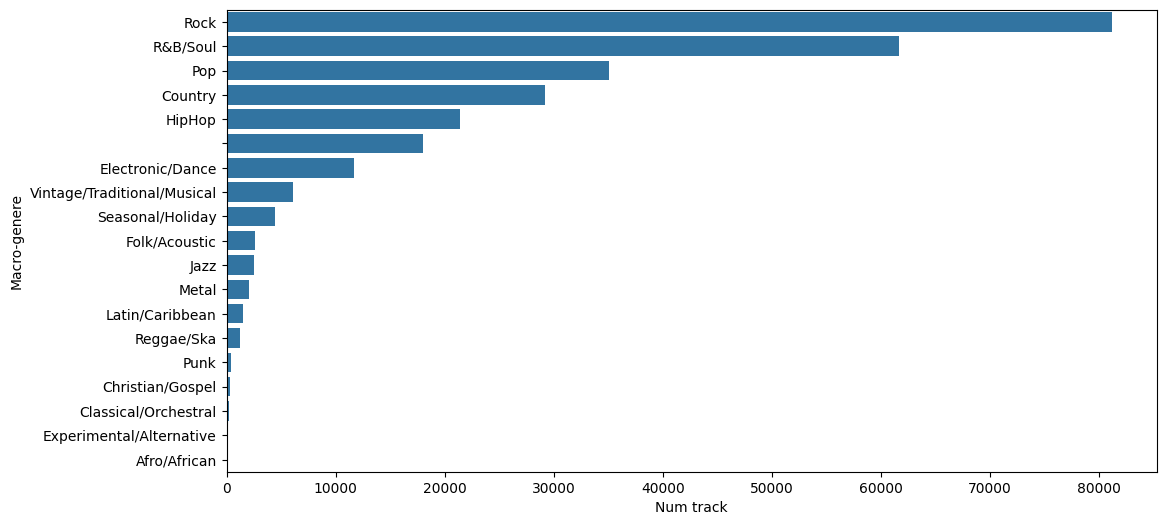

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12,6))
sns.countplot(data=final_df, y='primary_macro_genre', order=final_df['primary_macro_genre'].value_counts().index)
plt.xlabel("Num track")
plt.ylabel("Macro-genere")
plt.show()



## 2.5  Revision suspected NON SONG in genre: comedy/spoken word e todo el dataframe

- busqueda tracks que contienen "commentary"
- busqueda que estan en genero spoken word
- ELIMINACION de tracks NON SONG


In [55]:
# tracks con "Commentary" en el nombre o album

mask_commentary = (
    final_df["track_name"].str.lower().str.contains("commentary", na=False) |
    final_df["album_name"].str.lower().str.contains("commentary", na=False)
)

commentary_df = final_df[mask_commentary]

# por cancion unica 
commentary_unique = commentary_df.groupby(
    ["track_id", "track_name", "artist_name"], as_index=False
).size().drop(columns="size")

# % sobre dataset
pct_commentary = round((len(commentary_unique) / len(final_df)) * 100, 4)

print("Pistas 'Commentary' (unicas):", len(commentary_unique))
print("Porcentaje sobre el dataset:", pct_commentary, "%")

commentary_unique.head(10)


Pistas 'Commentary' (unicas): 5
Porcentaje sobre el dataset: 0.0018 %


,track_id,track_name,artist_name
0,01QAgElIaZwj5HRAuNa7ty,New Song,Howard Jones
1,37f3mGTsze76rLe1qE4gIC,Somethin' Bad - Commentary,Miranda Lambert
2,4J5pYBxMQko602Ye3JBPV0,Diamond Rings And Old Barstools - Commentary,Tim McGraw
3,57a2MQf5Vu7wWyDtSwX8h3,Meanwhile Back At Mama’s - Commentary,Tim McGraw
4,5TvE3pk05pyFIGdSY9j4DJ,Say Something,A Great Big World


In [56]:
# Tracks con genero "spoken word" 
def to_list(x):
    if isinstance(x, str):
        return [g.strip().lower() for g in x.split(",") if g.strip() != ""]
    return []

genre_lists = final_df["spotify_genres"].apply(to_list)

mask_spoken = genre_lists.apply(lambda lst: "spoken word" in lst)

spoken_df = final_df[mask_spoken]

# por cancion unica 
spoken_unique = spoken_df.groupby(
    ["track_id", "track_name", "artist_name"], as_index=False
).size().drop(columns="size")

# %
pct_spoken = round((len(spoken_unique) / len(final_df)) * 100, 4)

print("Pistas 'spoken word' (unicas):", len(spoken_unique))
print("Porcentaje sobre el dataset:", pct_spoken, "%")

spoken_unique.head(10)


Pistas 'spoken word' (unicas): 8
Porcentaje sobre el dataset: 0.0029 %


,track_id,track_name,artist_name
0,0955BzJf4FAaaQqjLyxhyE,History Repeats Itself,Buddy Starcher
1,0kXxMHIyDUDsUJZMS0fvw6,Gravy Waltz,Steve Allen
2,0pcQb5YE5KG0i4AMWaEfgL,Oliver Twist,Rod McKuen
3,2gMxsK1P5PF65J6q4rsCYl,He Made A Woman Out Of Me,Bobbie Gentry
4,2iw33rWGH2cjSFTkFJRoUf,A Married Man - Bonus Track,Richard Burton
5,575iSglXgYkqJxXQc5gjiC,Sunny,Bill Cosby
6,5FkXc3DG1CSmvwFtf8eL2L,Can You Feel It - Live On The Ed Sullivan Show...,Bobby Goldsboro
7,5V6wfV3Mkvd30zpSoKjsOh,Desiderata,Les Crane


In [57]:
# union de commentary + spoken word
no_song_df = (
    pd.concat([commentary_df, spoken_df])
    .drop_duplicates(subset=["track_id"])
)

pct_no_song = round((len(no_song_df) / len(final_df)) * 100, 4)

print("Total NO-SONG unicos:", len(no_song_df))
print("Porcentaje sobre el dataset:", pct_no_song, "%")

no_song_df.head(10)


Total NO-SONG unicos: 13
Porcentaje sobre el dataset: 0.0046 %


,id,year,date,position,song,artist_main,song_and_artist,album_name,release_date,duration_ms,...,track_popularity,spotify_genres,track_id,track_name,artist_id,artist_name,explicit,spotify_genres_list,macro_genres_all,primary_macro_genre
132856,132857,1984,1984-01-21,73,New Song,Howard Jones,New Song - Howard Jones,Human's Lib [(Deluxe Audio Commentary Edition)...,1984-03-08,255373.0,...,52,"new wave, synthpop",01QAgElIaZwj5HRAuNa7ty,New Song,6loBF9iQdE11WSX29fNKqY,Howard Jones,False,"[new wave, synthpop]","[Rock, Electronic/Dance]",Rock
288480,288481,2013,2013-11-23,16,Say Something,A Great Big World & Christina Aguilera,Say Something - A Great Big World & Christina ...,Is There Anybody Out There? - Track by Track C...,2014-01-16,229400.0,...,69,NaN,5TvE3pk05pyFIGdSY9j4DJ,Say Something,5xKp3UyavIBUsGy3DQdXeF,A Great Big World,False,[],[],
291303,291304,2014,2014-06-07,39,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood,Somethin' Bad - Miranda Lambert Duet With Carr...,Platinum Spotify Commentary,2014-06-02,109106.0,...,3,country,37f3mGTsze76rLe1qE4gIC,Somethin' Bad - Commentary,66lH4jAE7pqPlOlzUKbwA0,Miranda Lambert,False,[country],[Country],Country
291464,291465,2014,2014-06-14,100,Meanwhile Back At Mama's,Tim McGraw Featuring Faith Hill,Meanwhile Back At Mama's - Tim McGraw Featurin...,McGraw Machine Hits: 2013-2019 (Big Machine Ra...,2020-11-20,85970.0,...,2,"country, classic country",57a2MQf5Vu7wWyDtSwX8h3,Meanwhile Back At Mama’s - Commentary,6roFdX1y5BYSbp60OTJWMd,Tim McGraw,False,"[country, classic country]","[Country, Country]",Country
295562,295563,2015,2015-03-28,98,Diamond Rings And Old Barstools,Tim McGraw With Catherine Dunn,Diamond Rings And Old Barstools - Tim McGraw W...,McGraw Machine Hits: 2013-2019 (Big Machine Ra...,2020-11-20,76999.0,...,2,"country, classic country",4J5pYBxMQko602Ye3JBPV0,Diamond Rings And Old Barstools - Commentary,6roFdX1y5BYSbp60OTJWMd,Tim McGraw,False,"[country, classic country]","[Country, Country]",Country
18098,18099,1962,1962-01-20,99,Oliver Twist,Rod McKuen,Oliver Twist - Rod McKuen,Oliver Twist,1990-05-01,99123.0,...,0,spoken word,0pcQb5YE5KG0i4AMWaEfgL,Oliver Twist,62JorFOkIjXHHU7GMT9r77,Rod McKuen,False,[spoken word],[Experimental/Alternative],Experimental/Alternative
24693,24694,1963,1963-04-27,94,Gravy Waltz,Steve Allen,Gravy Waltz - Steve Allen,Gravy Waltz & 11 Current Hits!,2011-05-01,158906.0,...,0,spoken word,0kXxMHIyDUDsUJZMS0fvw6,Gravy Waltz,0e8WTsKHdhxtwPgT8gdQ1a,Steve Allen,False,[spoken word],[Experimental/Alternative],Experimental/Alternative
33879,33880,1965,1965-01-30,80,Married Man,Richard Burton,Married Man - Richard Burton,Baker Street,2006-01-01,149280.0,...,0,spoken word,2iw33rWGH2cjSFTkFJRoUf,A Married Man - Bonus Track,3axaLrA0gIANDLYAv9pC9P,Richard Burton,False,[spoken word],[Experimental/Alternative],Experimental/Alternative
40081,40082,1966,1966-04-09,82,History Repeats Itself,Buddy Starcher,History Repeats Itself - Buddy Starcher,History Repeats Itself,2011-05-01,149426.0,...,0,spoken word,0955BzJf4FAaaQqjLyxhyE,History Repeats Itself,4n2kb5iYdGkbWDRrObBbjZ,Buddy Starcher,False,[spoken word],[Experimental/Alternative],Experimental/Alternative
48677,48678,1967,1967-12-02,78,Hooray For The Salvation Army Band,Bill Cosby,Hooray For The Salvation Army Band - Bill Cosby,Bill Cosby Sings Hooray For The Salvation Army...,1968,206986.0,...,4,"comedy, spoken word",575iSglXgYkqJxXQc5gjiC,Sunny,4JeqRr8Upw5uxLEu6jgIRm,Bill Cosby,False,"[comedy, spoken word]","[Vintage/Traditional/Musical, Experimental/Alt...",Vintage/Traditional/Musical


### ELIMINACION DE NON SONG

In [58]:
############ 
# ELIMINACION NO-SONG 

# ids de Tracks no-cancion
no_song_ids = no_song_df["track_id"].unique().tolist()

print("Total tracks NO-SONG a eliminar:", len(no_song_ids))

# eliminar del dataframe principal
final_df_before = len(final_df)
final_df = final_df[~final_df["track_id"].isin(no_song_ids)]
final_df_after = len(final_df)

print("Filas antes:", final_df_before)
print("Filas despues:", final_df_after)
print("Canciones eliminadas:", final_df_before - final_df_after)

# comprobacion final
print("\nCheck final NO-SONG dentro del dataset:", 
      final_df["track_id"].isin(no_song_ids).sum(), " -> debe ser 0")

Total tracks NO-SONG a eliminar: 13
Filas antes: 279575
Filas despues: 279424
Canciones eliminadas: 151

Check final NO-SONG dentro del dataset: 0  -> debe ser 0


# 3. Creaccion columnas para Analisis y Revision final

- 3.1 Creacion de columnas derivadas ( dummies para era tecnológica, etcetc)
- 3.2 Revision de duplicados y consistencia
- 3.3 Orden final de columnas y Guardado del dataset limpio

## 3.1 Creación de columnas derivadas (duration_min, era_tecnológica, columnas booleanas por macro-género)

En esta sección creamos:

- "era_tecnologica"  por 4 eras históricas: vinilo 1958, CD 1983, MP3 y DIGITAL 2000+, STREAMING 2011

- Columnas booleanas  para todos los macro-géneros presentes en "primary_macro_genre" (para ANOVA)



In [ ]:
### Creacion de era_tecnológica 
def map_era(year):
    if 1958 <= year <= 1986:
        return "Vinilo"
    elif 1987 <= year <= 2003:
        return "CD"
    elif 2004 <= year <= 2014:
        return "MP3_Digital"
    else:
        return "Streaming"

final_df["era_tecnologica"] = final_df["year"].apply(map_era)



### Creacion de columnas booleanas para TODOS los macro-géneros

# lista de géneros únicos
generi_macro = final_df["primary_macro_genre"].unique().tolist()

# quitamos el género vacío si existe
generi_macro = [g for g in generi_macro if g not in ["", None]]

# creación de todas las columnas BOOL
for gen in generi_macro:
    col_name = f"genre_{gen.replace('/', '_').replace(' ', '_').lower()}"
    final_df[col_name] = (final_df["primary_macro_genre"] == gen).astype(int)

print("Columnas booleanas creadas:", len(generi_macro))


Columnas booleanas creadas: 18


In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279424 entries, 0 to 330068
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   id                                 279424 non-null  int64         
 1   year                               279424 non-null  int64         
 2   date                               279424 non-null  datetime64[ns]
 3   position                           279424 non-null  int64         
 4   song                               279424 non-null  object        
 5   artist_main                        279424 non-null  object        
 6   song_and_artist                    279424 non-null  object        
 7   album_name                         279424 non-null  object        
 8   release_date                       279424 non-null  object        
 9   duration_ms                        279424 non-null  float64       
 10  duration_min             

## 3.2 Revision de duplicados y consistencia


### - check Duplicados

In [62]:
cols = [c for c in final_df.columns if final_df[c].apply(lambda x: isinstance(x,list)).sum() == 0]

# Duplicati assoluti sulle colonne hashable
total_duplicates_absolute = final_df[cols].duplicated().sum()
print(f"Duplicados absolutos: {total_duplicates_absolute}")



Duplicados absolutos: 0


In [63]:
# check duplicados por track_id (consistencia)
dup_track = final_df.duplicated(subset=["track_id"], keep=False)

print("Tracks duplicados (esperado: multiplas semanas en lista):", dup_track.sum())
print("Tracks unicos:", final_df['track_id'].nunique())
print("Filas totales:", len(final_df))


Tracks duplicados (esperado: multiplas semanas en lista): 277473
Tracks unicos: 24139
Filas totales: 279424


## 3.3 Orden final de columnas y Guardado del dataset limpio
- orden columnas
- SAVE FINAL CLEANED como:
    - spotify_clean_full.csv
    - AND
    - spotify_clean_for_anova.csv (SOLO COLUMNAS PARA ANOVA)

In [64]:
final_df.columns

Index(['id', 'year', 'date', 'position', 'song', 'artist_main',
       'song_and_artist', 'album_name', 'release_date', 'duration_ms',
       'duration_min', 'track_popularity', 'spotify_genres', 'track_id',
       'track_name', 'artist_id', 'artist_name', 'explicit',
       'spotify_genres_list', 'macro_genres_all', 'primary_macro_genre',
       'era_tecnologica', 'genre_rock', 'genre_latin_caribbean',
       'genre_vintage_traditional_musical', 'genre_r&b_soul', 'genre_jazz',
       'genre_country', 'genre_seasonal_holiday', 'genre_folk_acoustic',
       'genre_punk', 'genre_pop', 'genre_electronic_dance',
       'genre_classical_orchestral', 'genre_christian_gospel',
       'genre_reggae_ska', 'genre_hiphop', 'genre_experimental_alternative',
       'genre_afro_african', 'genre_metal'],
      dtype='object')

In [65]:
cols_order = [
    'id', 'date', 'position',
    'song', 'album_name', 'artist_main',
    'primary_macro_genre', 'macro_genres_all', 'spotify_genres_list',
    'duration_min', 'track_popularity',

    'track_id', 'track_name', 'artist_id', 'artist_name', 'explicit',
    'spotify_genres', 'duration_ms', 'release_date', 'song_and_artist',
    'year',

    #
    'era_tecnologica',

    # BOOL macro-generi 
    'genre_afro_african',
    'genre_christian_gospel',
    'genre_classical_orchestral',
    'genre_country',
    'genre_electronic_dance',
    'genre_experimental_alternative',
    'genre_folk_acoustic',
    'genre_hiphop',
    'genre_jazz',
    'genre_latin_caribbean',
    'genre_metal',
    'genre_pop',
    'genre_punk',
    'genre_r&b_soul',
    'genre_reggae_ska',
    'genre_seasonal_holiday',
    'genre_vintage_traditional_musical',
    'genre_rock',


]

final_df = final_df[cols_order]
final_df.head(1)


,id,date,position,song,album_name,artist_main,primary_macro_genre,macro_genres_all,spotify_genres_list,duration_min,...,genre_jazz,genre_latin_caribbean,genre_metal,genre_pop,genre_punk,genre_r&b_soul,genre_reggae_ska,genre_seasonal_holiday,genre_vintage_traditional_musical,genre_rock
0,1,1958-08-04,1,Poor Little Fool,Ricky Nelson (Expanded Edition / Remastered),Ricky Nelson,Rock,"[Rock, R&B/Soul]","[rockabilly, doo-wop]",2.57,...,0,0,0,0,0,0,0,0,0,1


In [66]:
final_df.isnull().sum() , final_df.dtypes


(id                                       0
 date                                     0
 position                                 0
 song                                     0
 album_name                               0
 artist_main                              0
 primary_macro_genre                      0
 macro_genres_all                         0
 spotify_genres_list                      0
 duration_min                             0
 track_popularity                         0
 track_id                                 0
 track_name                               0
 artist_id                                0
 artist_name                              0
 explicit                                 0
 spotify_genres                       17940
 duration_ms                              0
 release_date                             0
 song_and_artist                          0
 year                                     0
 era_tecnologica                          0
 genre_afro_african             

In [67]:
print(final_df['era_tecnologica'].value_counts())
print(final_df['primary_macro_genre'].value_counts())


era_tecnologica
Vinilo         131213
CD              75350
MP3_Digital     45907
Streaming       26954
Name: count, dtype: int64
primary_macro_genre
Rock                           81168
R&B/Soul                       61599
Pop                            35068
Country                        29136
HipHop                         21412
                               17940
Electronic/Dance               11643
Vintage/Traditional/Musical     6058
Seasonal/Holiday                4481
Folk/Acoustic                   2577
Jazz                            2541
Metal                           2038
Latin/Caribbean                 1538
Reggae/Ska                      1202
Punk                             399
Christian/Gospel                 353
Classical/Orchestral             207
Experimental/Alternative          45
Afro/African                      19
Name: count, dtype: int64


### SAVE FINAL:
- spotify_clean_full.csv

- spotify_clean_for_anova.csv (SOLO COLUMNAS PARA ANOVA)

In [ ]:

import pandas as pd

# File paths
output_full   = r"C:\Users\edo\Desktop\Final Project\spotify_clean_full.csv"
output_anova  = r"C:\Users\edo\Desktop\Final Project\spotify_clean_for_anova.csv"

# Columnas para ANOVA/Tukey
cols_for_anova = [
    "id",
    "duration_min",
    "primary_macro_genre",
    "era_tecnologica",
    "track_popularity",
    "position",
    "explicit",
    "year"
]

# SAVE File COMPLETE
final_df.to_csv(output_full, index=False)
print(f"- OK! CSV completo saved in:\n{output_full}\n")

# SAVE File ANOVA
final_df[cols_for_anova].to_csv(output_anova, index=False)
print(f"- OK! CSV ANOVA saved in:\n{output_anova}\n")

# Check
print("Shape full   :", final_df.shape)
print("Shape anova  :", final_df[cols_for_anova].shape)



- OK! CSV completo saved in:
C:\Users\edo\Desktop\Progetto Finale\spotify_clean_full.csv

- OK! CSV ANOVA saved in:
C:\Users\edo\Desktop\Progetto Finale\spotify_clean_for_anova.csv

Shape full   : (279424, 40)
Shape anova  : (279424, 8)



### GRAFICO DURATION

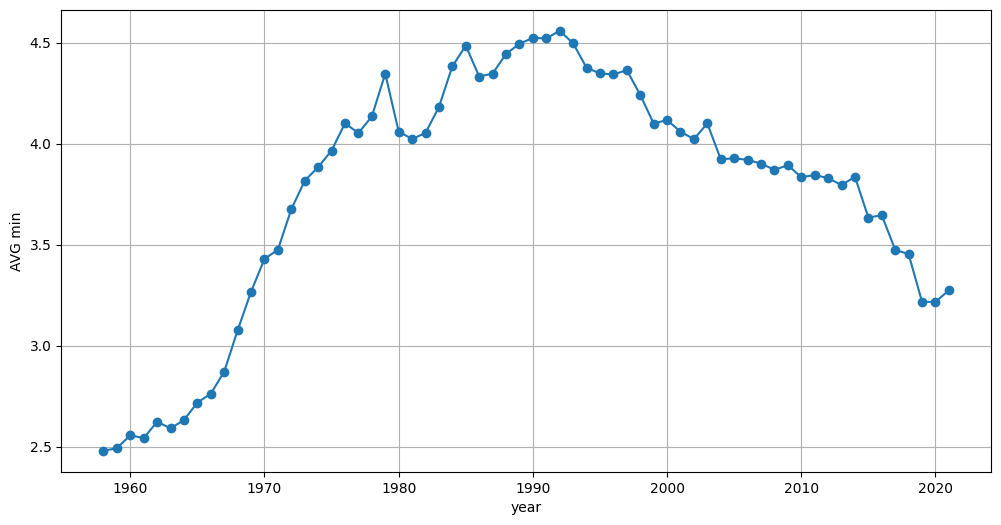

In [ ]:
import matplotlib.pyplot as plt

avg_duration_per_year = final_df.groupby('year')['duration_min'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_duration_per_year['year'], avg_duration_per_year['duration_min'], marker='o')
plt.xlabel("year")
plt.ylabel("AVG min")
plt.grid(True)
plt.show()